**GP Symbolic Regression - Ehsan Espandar - 99442011 - AI - Spring 2024**


In [3]:
import math
import random
from graphviz import Digraph
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import Image, display, HTML
from PIL import Image
import numpy as np
from decimal import Decimal
import copy
import matplotlib.pyplot as plt

##Implementation

> In the first part I only want to implement the classes and functions, and also make sure that they are working.



In [1]:
def func(x,y,z):
  return 2*x+1

def func2dim(x,y,z):
  return 2*x+np.sin(y)

def func3dim(x,y,z):
  return 2*x+np.sin(y)+np.cos(z)

def func4 (x,y,z):
  return x + math.exp(x)

def func5 (x,y,z):
  if x<0:
    return x+2
  if x>=0 and x<5:
    return np.power(x,2)
  if x>=5 :
    return x

def calculate_mse(chromosome, points, func):
    predicted_values = [chromosome.evaluate(chromosome.root, point) for point in points]
    actual_values = [func(point['x'], point['y'], point['z']) for point in points]

    # Calculate squared differences between predicted and actual values
    squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]

    # Calculate the mean squared error
    mse = sum(squared_errors) / len(points)
    return mse

In [6]:
class Gene:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


In [7]:
class Chromosome:
    def __init__(self, depth,vars):
        self.root = self.generate_tree(depth,vars)


    def generate_tree(self, depth,vars):
        if depth == 0:
            return Gene(val=random.choice(vars+[random.randint(1,10)]))
        else:
            val = random.choice(vars+[random.randint(1,10),'sin','cosin','+','-','*','/','^'])
            if (val in vars) or type(val)==int:
              return Gene(val=val,left=None,right=None)
            elif val in ['sin','cosin']:
              left = self.generate_tree(depth-1,vars)
              return Gene(val=val,left=left,right=None)
            else:
              left = self.generate_tree(depth - 1,vars)
              right = self.generate_tree(depth - 1,vars)
              return Gene(val=val, left=left, right=right)

    def visualize_tree(self, dot=None, node=None):
        if dot is None:
            dot = Digraph()

        if node is None:
            node = self.root

        dot.node(str(node), label=str(node.val))

        if node.left:
            dot.edge(str(node), str(node.left))
            self.visualize_tree(dot, node.left)

        if node.right:
            dot.edge(str(node), str(node.right))
            self.visualize_tree(dot, node.right)

        return dot

    def evalFitness(self,input,func):
      fitness = 0
      for var in input:
        realVal = func(var['x'],var['y'],var['z'])
        chromosomeVal = self.evaluate(self.root,var)
        fitness+= 1/calculate_mse(self,input,func)
      return float("{:.4f}".format(fitness))

    def evaluate(self,node, variables):

        if isinstance(node.val, int):
            return node.val
        elif node.val in variables:
            return variables[node.val]


        if node.val == '+':
            left_value = self.evaluate(node.left, variables)
            right_value = self.evaluate(node.right, variables)
            return np.float64("{:.4f}".format((left_value) + (right_value)))
        elif node.val == '-':
            left_value = self.evaluate(node.left, variables)
            right_value = self.evaluate(node.right, variables)
            return np.float64("{:.4f}".format((left_value) - (right_value)))
        elif node.val == '*':
            left_value = self.evaluate(node.left, variables)
            right_value = self.evaluate(node.right, variables)
            return np.float64("{:.4f}".format((left_value) * (right_value)))
        elif node.val == '/':
            left_value = self.evaluate(node.left, variables)
            right_value = self.evaluate(node.right, variables)
            if right_value == 0:
              return np.float64(0)
            return np.float64("{:.4f}".format((left_value) / (right_value)))
        elif node.val == '^':
            left_value = self.evaluate(node.left, variables)
            right_value = self.evaluate(node.right, variables)
            if left_value < 0 and isinstance(right_value,int) :
              result = np.power(np.float64("{:.4f}".format((left_value))), int(right_value))
            elif left_value <0 and not(isinstance(right_value,int)):
              return np.float64(0)
            if left_value == 0:
              return np.float64(0)
            else:
              result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))
            return np.float64("{:.4f}".format(result))
        elif node.val == 'sin':
            left_value = self.evaluate(node.left, variables)
            if  math.isinf(left_value):
              return np.float64(0)
            result = (math.sin(left_value))
            return np.float64("{:.4f}".format(result))
        elif node.val == 'cosin':
            left_value = self.evaluate(node.left, variables)
            if  math.isinf(left_value):
              return np.float64(0)
            result = (math.cos(left_value))
            return np.float64("{:.4f}".format(result))

        return None

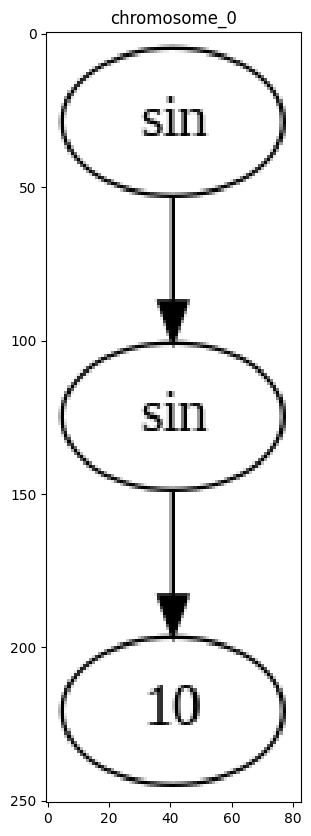

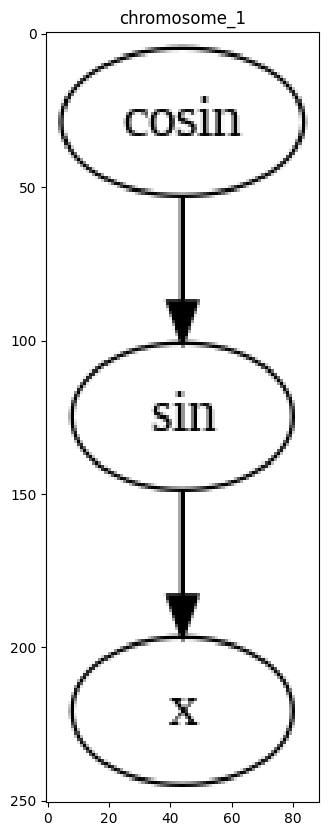

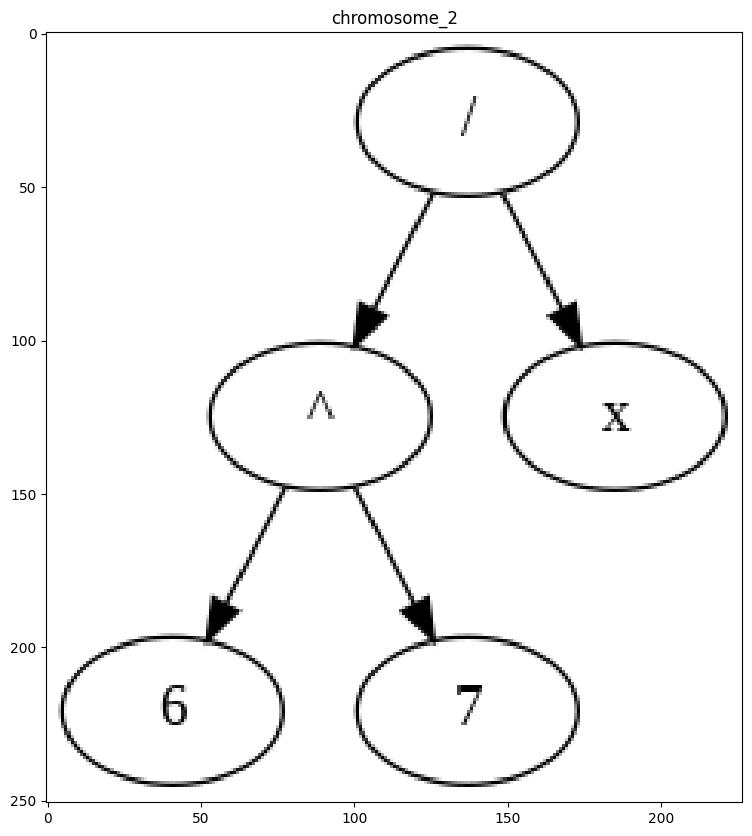

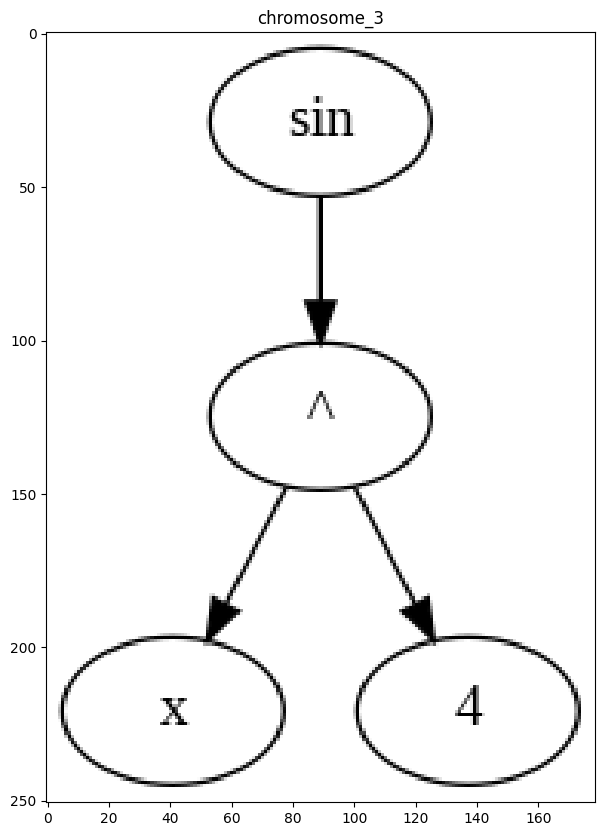

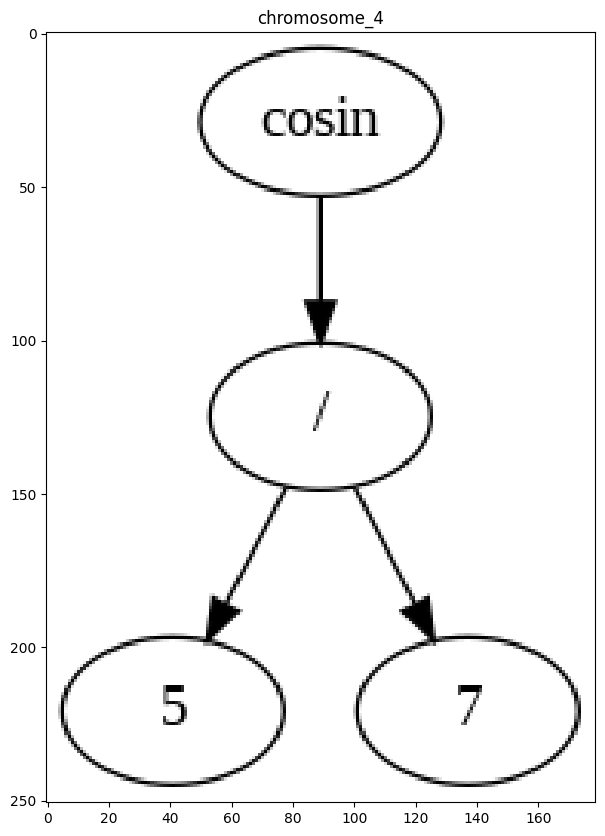

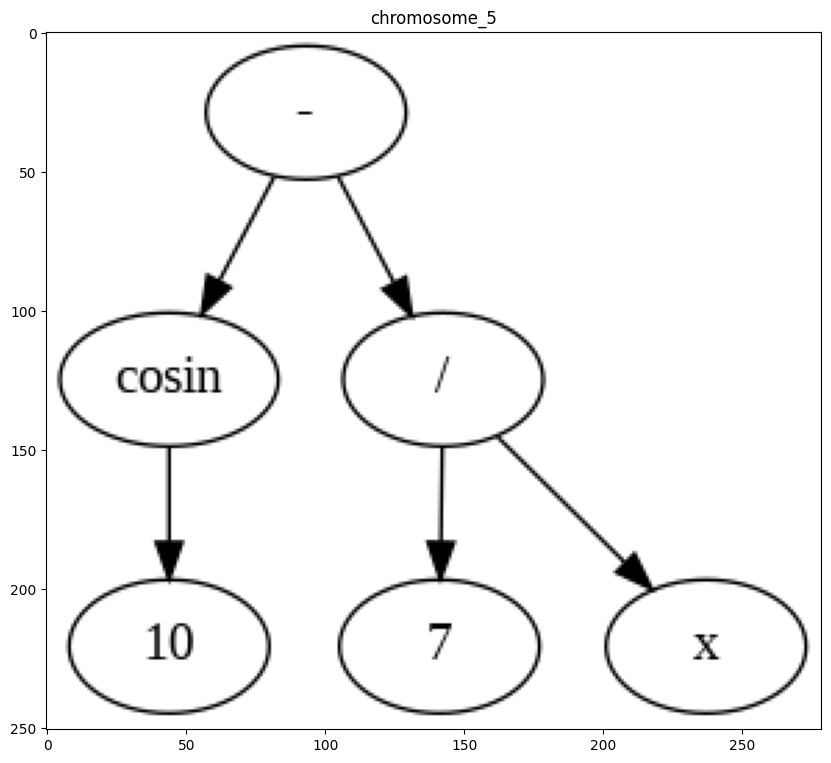

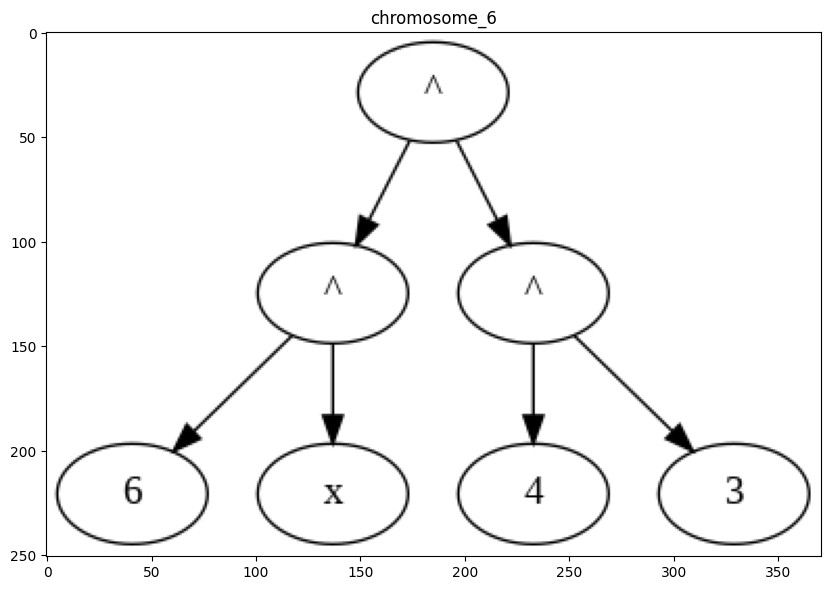

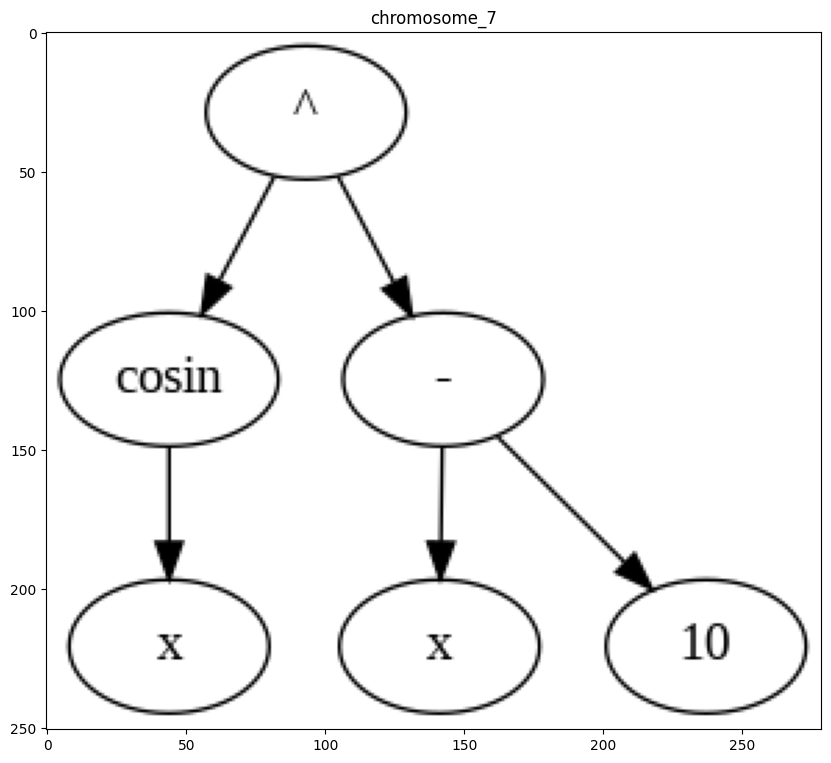

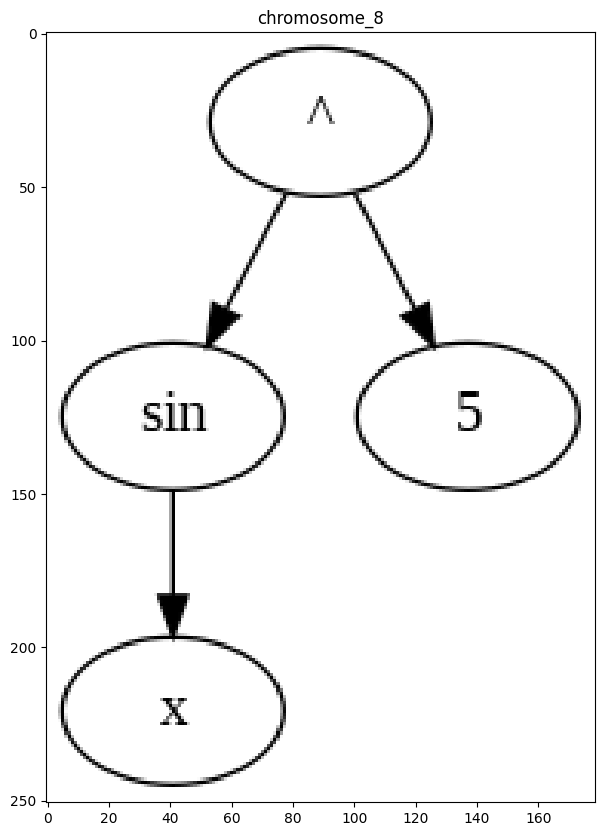

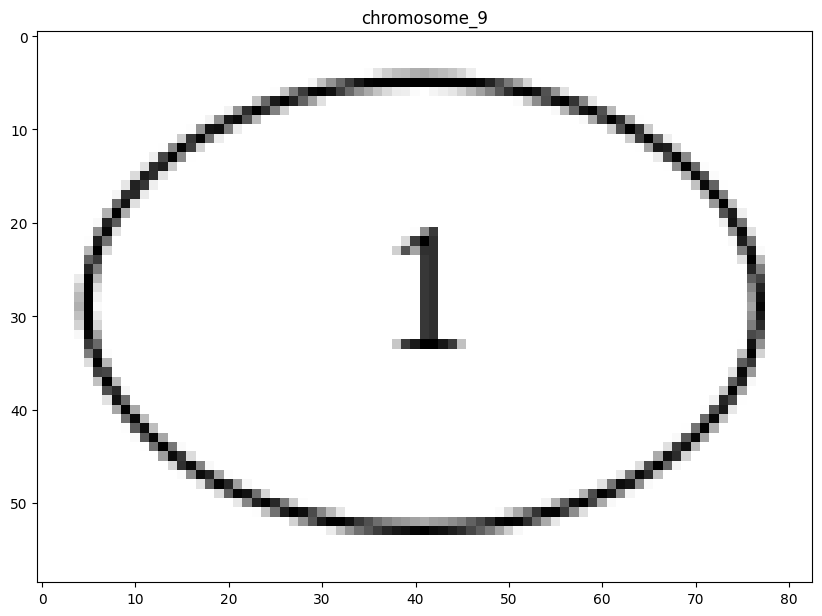

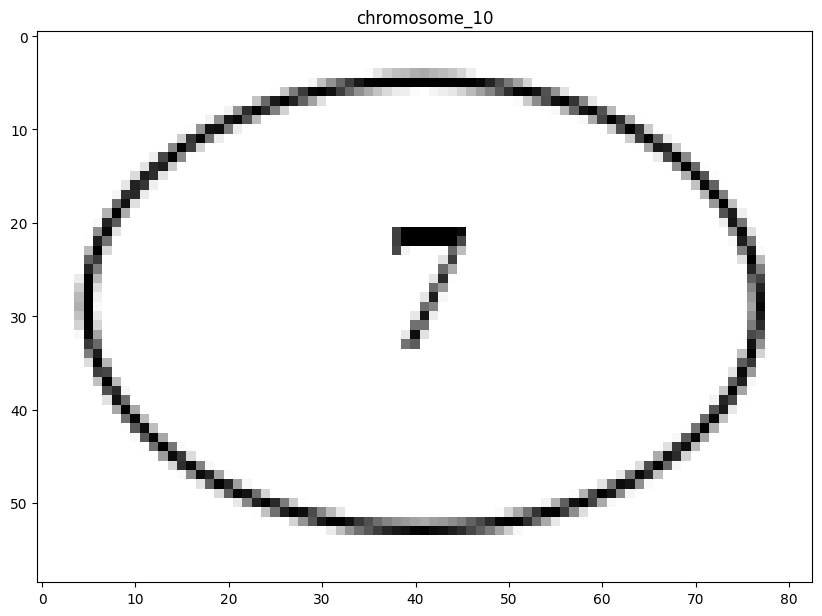

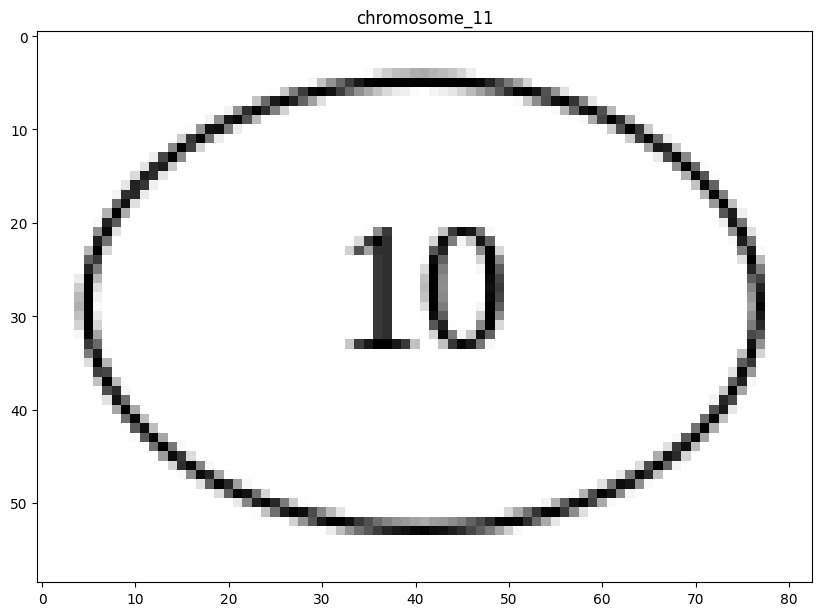

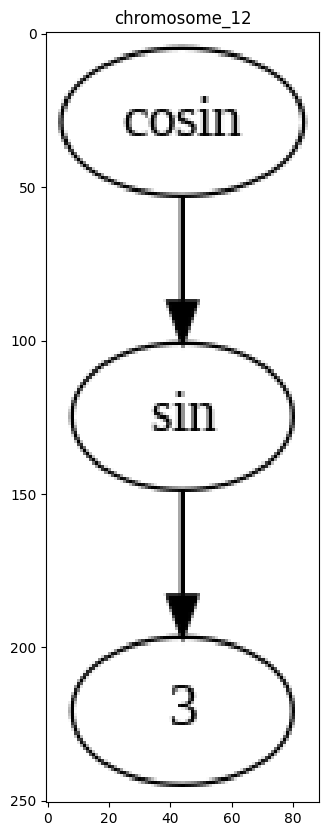

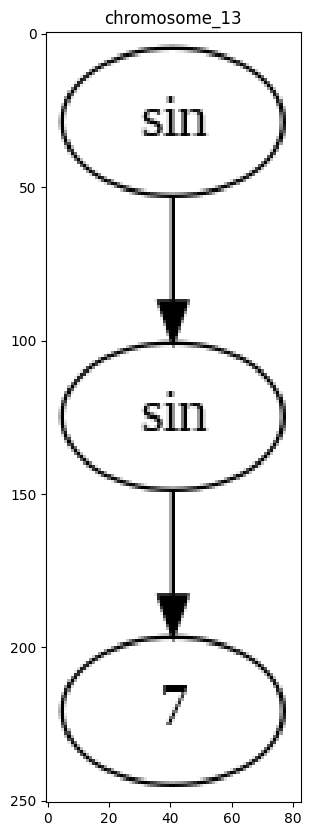

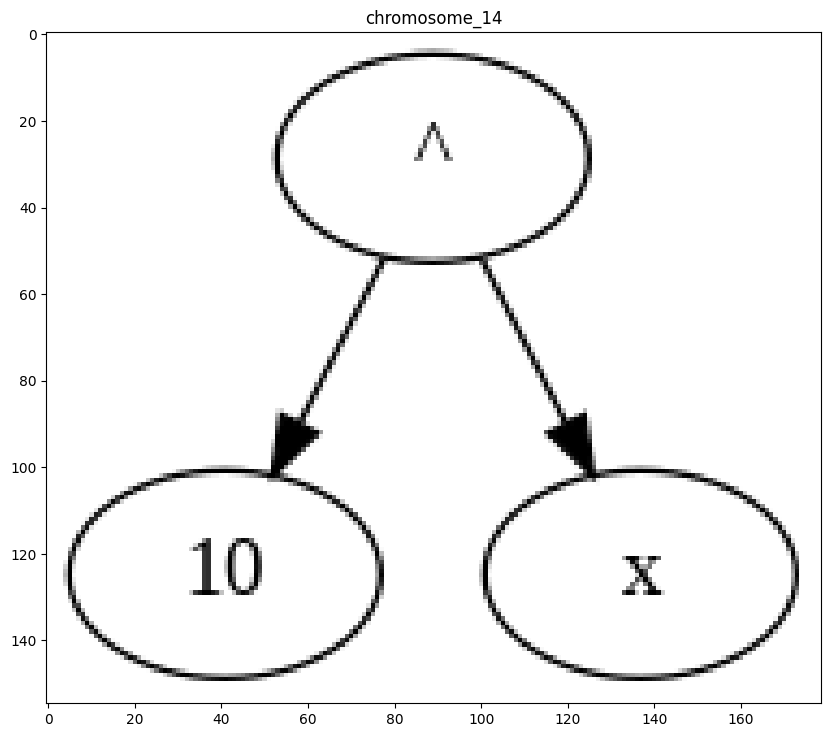

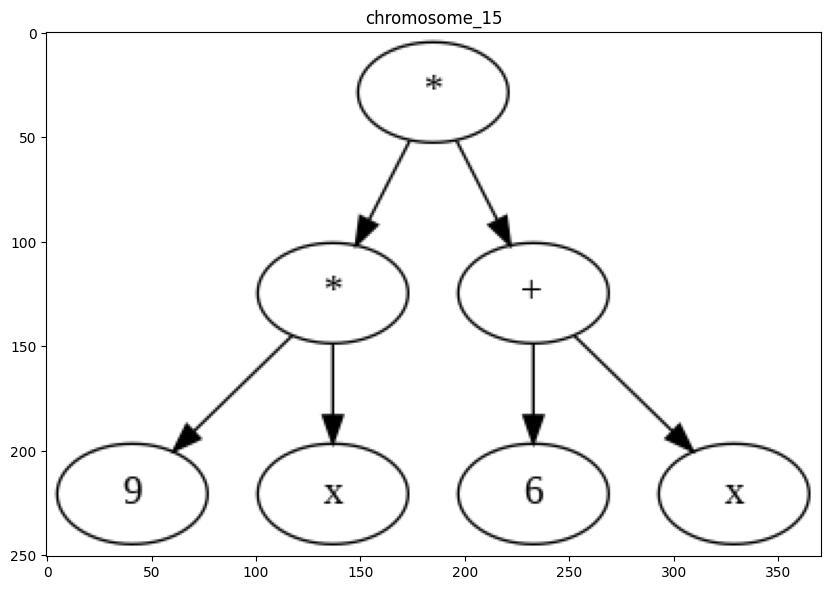

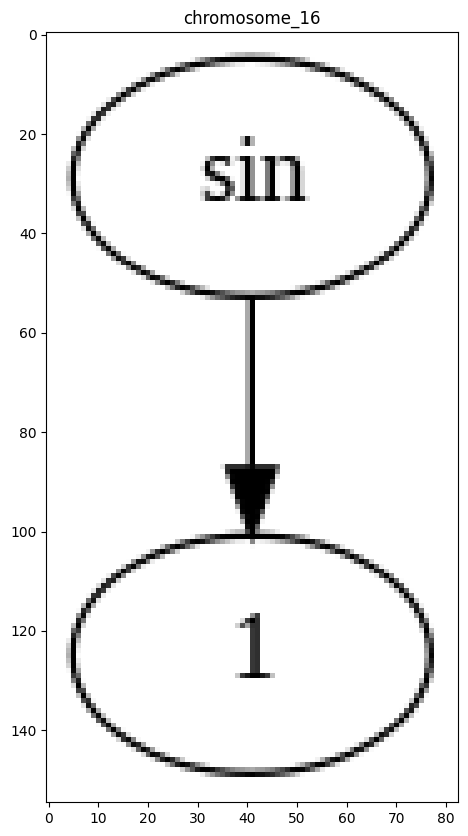

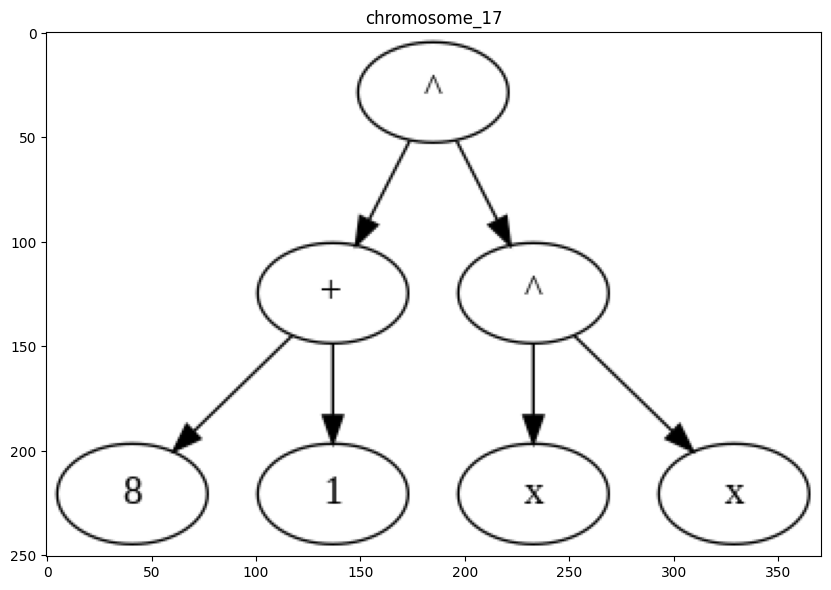

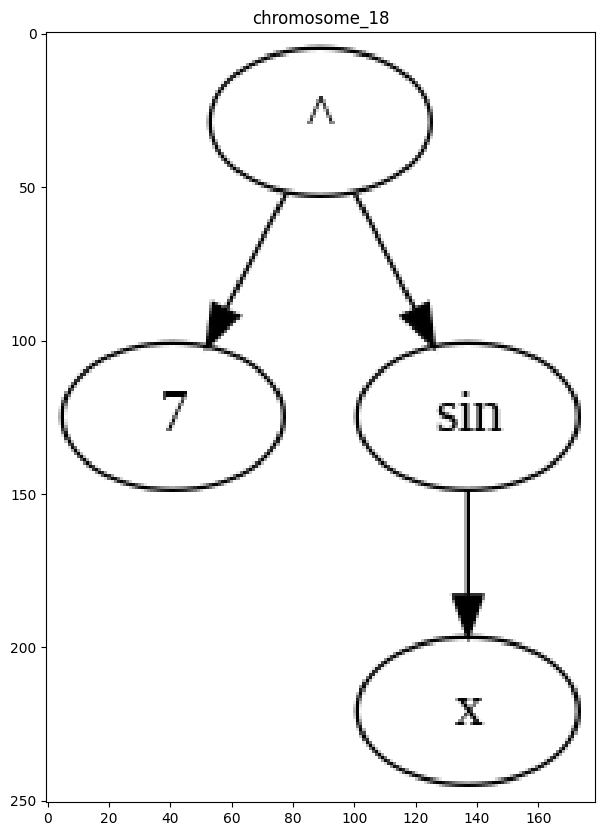

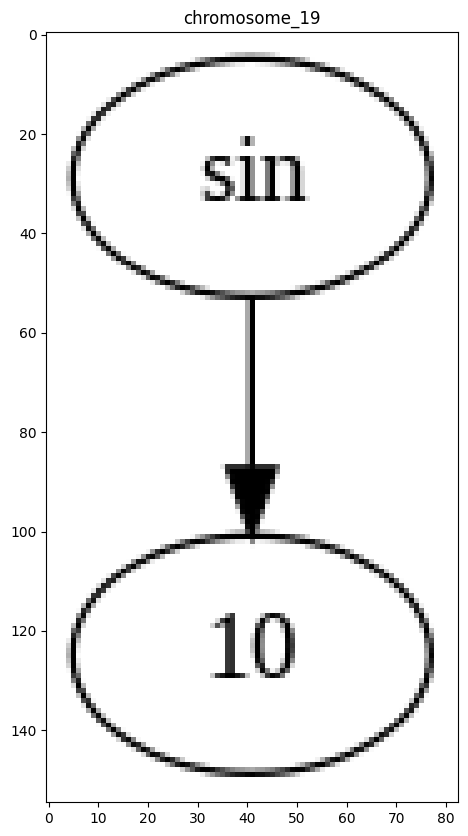

In [8]:

depth = 2
vars = ['x']
num_chromosomes = 20

chromosomes = []

for i in range(num_chromosomes):
    chromosomes.append(Chromosome(depth, vars))
    dot = chromosomes[i].visualize_tree()
    dot.render(f'chromosome_{i}', format='png', cleanup=True)
    img = Image.open(f'chromosome_{i}.png')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    plt.title(f'chromosome_{i}')
    plt.show()

In [9]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
z_min, z_max = -5, 5


num_points = 50


points = []
for _ in range(num_points):
    point = {
        'x': np.random.uniform(x_min, x_max),
        'y': np.random.uniform(y_min, y_max),
        'z': np.random.uniform(z_min, z_max)
    }
    points.append(point)

In [10]:
for chromosome in chromosomes:
  print(f'chromosome {chromosomes.index(chromosome)} Fitness : {chromosome.evalFitness(points,func)}',type(chromosome.evalFitness(points,func)))

chromosome 0 Fitness : 1.3097 <class 'float'>
chromosome 1 Fitness : 1.4299 <class 'float'>
chromosome 2 Fitness : 0.0 <class 'float'>
chromosome 3 Fitness : 1.4005 <class 'float'>
chromosome 4 Fitness : 1.4451 <class 'float'>
chromosome 5 Fitness : 0.1011 <class 'float'>


<ipython-input-1-b8f37f2f129a>:26: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


chromosome 6 Fitness : 0.0 <class 'float'>
chromosome 7 Fitness : 0.0 <class 'float'>
chromosome 8 Fitness : 1.3373 <class 'float'>
chromosome 9 Fitness : 1.4584 <class 'float'>
chromosome 10 Fitness : 0.7813 <class 'float'>
chromosome 11 Fitness : 0.4724 <class 'float'>
chromosome 12 Fitness : 1.458 <class 'float'>
chromosome 13 Fitness : 1.435 <class 'float'>
chromosome 14 Fitness : 0.0 <class 'float'>
chromosome 15 Fitness : 0.0014 <class 'float'>
chromosome 16 Fitness : 1.4503 <class 'float'>
chromosome 17 Fitness : 0.0 <class 'float'>
chromosome 18 Fitness : 1.1832 <class 'float'>
chromosome 19 Fitness : 1.306 <class 'float'>


<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))


In [11]:
fitnesses = []
for chromosome in chromosomes:
  fitnesses.append(chromosome.evalFitness(points,func))

print(fitnesses)

[1.3097, 1.4299, 0.0, 1.4005, 1.4451, 0.1011, 0.0, 0.0, 1.3373, 1.4584, 0.7813, 0.4724, 1.458, 1.435, 0.0, 0.0014, 1.4503, 0.0, 1.1832, 1.306]


<ipython-input-1-b8f37f2f129a>:26: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]
<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))


In [12]:
def select_chromosomes(chromosomes, fitnesses, num_selections=10):
    selected_chromosomes = []
    remaining_fitnesses = fitnesses.copy()
    for _ in range(num_selections):
        total_fitness = sum(remaining_fitnesses)
        if not np.isfinite(total_fitness) or total_fitness <= 0:

            return []
        probabilities = [fitness / total_fitness for fitness in remaining_fitnesses]
        selected_index = random.choices(range(len(chromosomes)), weights=probabilities)[0]
        selected_chromosome = chromosomes[selected_index]
        selected_fitness = remaining_fitnesses[selected_index]
        selected_chromosomes.append({'chromosome':selected_chromosome, 'fitness':selected_fitness})
        remaining_fitnesses[selected_index] = 0
    return selected_chromosomes

In [13]:
selected_chromosomes = select_chromosomes(chromosomes,fitnesses)
for item in selected_chromosomes:
  print(f'chromosome {chromosomes.index(item["chromosome"])} Fitness : {item["fitness"]}')

chromosome 9 Fitness : 1.4584
chromosome 1 Fitness : 1.4299
chromosome 12 Fitness : 1.458
chromosome 8 Fitness : 1.3373
chromosome 3 Fitness : 1.4005
chromosome 0 Fitness : 1.3097
chromosome 16 Fitness : 1.4503
chromosome 19 Fitness : 1.306
chromosome 13 Fitness : 1.435
chromosome 4 Fitness : 1.4451


In [14]:
def crossover(chromosome1, chromosome2):

    node1 = copy.deepcopy(chromosome1)
    node2 = copy.deepcopy(chromosome2)


    new_node1,new_node2 = change_subtree(node1, node2)

    return [new_node1,new_node2]

def change_subtree(node1, node2):
    if (node1.root.val in ['x','y','z'] or isinstance(node1.root.val,int)) and (node2.root.val in ['x','y','z'] or isinstance(node2.root.val,int)) :
      return node1,node2
    elif node1.root.val in ['x','y','z'] or isinstance(node1.root.val,int):
      node2.root.left = node1.root
      return node1,node2
    elif node2.root.val in ['x','y','z'] or isinstance(node2.root.val,int):
      node1.root.left = node2.root
      return node1,node2
    else:
      node1.root.left,node2.root.left = node2.root.left,node1.root.left
      return node1,node2

def mutate_subtree(chromosome, vars, max_depth=2):


    selected_node = select_random_node(chromosome.root)


    new_chromosome = Chromosome(random.randint(1, max_depth), vars)



    replace_subtree(selected_node, new_chromosome.root)

    return chromosome


def select_random_node(node):


    if random.random() < 0.25:
        return node
    else:
        if node.left:
            return select_random_node(node.left)
        elif node.right:
            return select_random_node(node.right)
        else:
            return node

def replace_subtree(node, new_subtree_root):

    node.val = new_subtree_root.val
    node.left = new_subtree_root.left
    node.right = new_subtree_root.right

1.4584 1.4295


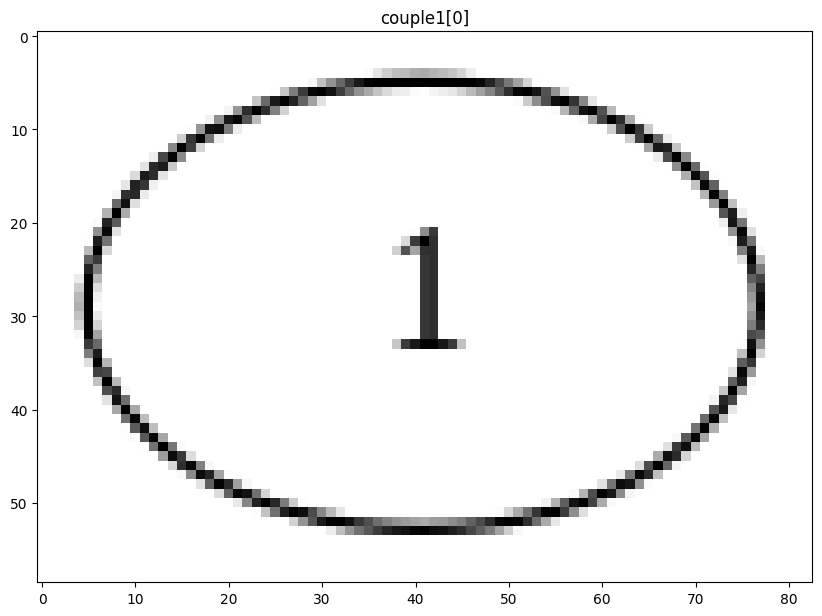

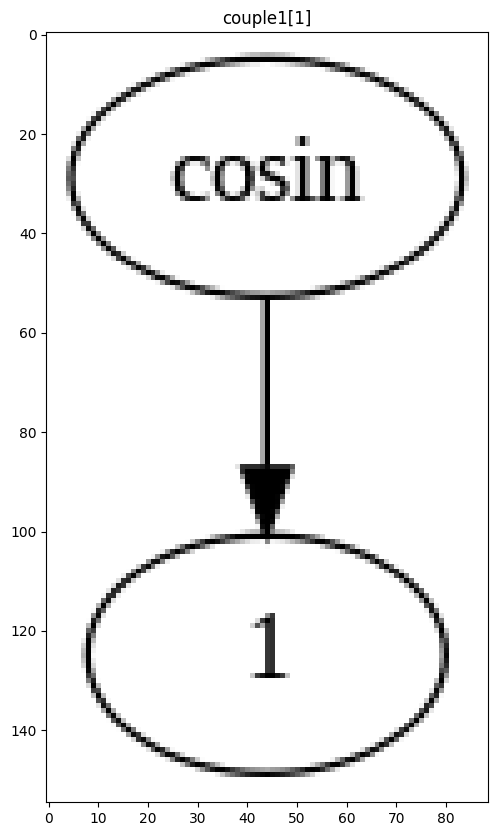

In [15]:
couple1 = crossover(selected_chromosomes[0]['chromosome'],selected_chromosomes[1]['chromosome'])

print(couple1[0].evalFitness(points,func),couple1[1].evalFitness(points,func))

dot = couple1[0].visualize_tree()
dot.render(f'couple1[0]', format='png', cleanup=True)
img = Image.open(f'couple1[0].png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'couple1[0]')
plt.show()

dot = couple1[1].visualize_tree()
dot.render(f'couple1[1]', format='png', cleanup=True)
img = Image.open(f'couple1[1].png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'couple1[1]')
plt.show()

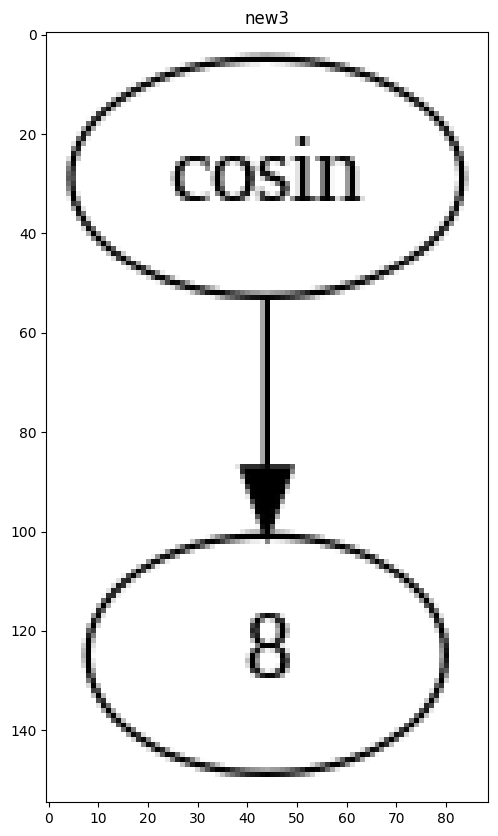

In [16]:
new3 = mutate_subtree(couple1[0],vars)

dot = new3.visualize_tree()
dot.render(f'new3', format='png', cleanup=True)
img = Image.open(f'new3.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'new3')
plt.show()


In [17]:
def evolve_population(chromosomes,fitnesses, func, vars):
    best_gen = []
    best_chromosomes = select_chromosomes(chromosomes,fitnesses)
    first_gen=[]
    for i in range(len(best_chromosomes)):
      for j in range(i+1,len(best_chromosomes)):
          first_gen.append(crossover(best_chromosomes[i]['chromosome'],best_chromosomes[j]['chromosome']))
    for c in first_gen:
      for i in c:
        i = mutate_subtree(i,vars)
    next_gen = []
    for c in first_gen:
      for i in c:
        next_gen.append(i)

    best_gen = next_gen.copy()

    for i in range(30):
      first_gen.clear()
      fitnesses = [item.evalFitness(points,func) for item in next_gen]
      best_chromosomes = select_chromosomes(next_gen,fitnesses)
      if np.isnan(np.average(fitnesses)):
        break


      print(f'Generation {i} has an average fitness of {np.average(fitnesses)}')
      for i in range(len(best_chromosomes)):
        for j in range(i+1,len(best_chromosomes)):
            first_gen.append(crossover(best_chromosomes[i]['chromosome'],best_chromosomes[j]['chromosome']))
      for c in first_gen:
        for i in c:
          i = mutate_subtree(i,vars)
      next_gen.clear()
      for c in first_gen:
        for i in c:
          next_gen.append(i)

      new_fitnesses = [item.evalFitness(points,func) for item in next_gen]
      if np.average(new_fitnesses) > np.average([item.evalFitness(points,func) for item in best_gen]):
        best_gen=next_gen.copy()
      if abs(np.average([new-old for new,old in zip(new_fitnesses,fitnesses)])) < 0.0001:

        break
    print(f'best_generation returned fitness avarage : {np.average([item.evalFitness(points,func) for item in best_gen])}')
    return best_gen

## Regression Using GP



> After Implementing the necessary classes and functions, from now on I will try to create my predictions using my chromosome class and my crossover,fitness, and mutation related functions.


*   here I test my first simple function first $2x+1$ which I have shown the initial chromosomes above :






In [18]:
best_generation = evolve_population(chromosomes,fitnesses,func,vars)

<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))
<ipython-input-1-b8f37f2f129a>:26: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


Generation 0 has an average fitness of 1.45311
Generation 1 has an average fitness of 1.505011111111111
Generation 2 has an average fitness of 1.9368766666666668
Generation 3 has an average fitness of 1.7306233333333334
Generation 4 has an average fitness of 3.929514444444445
Generation 5 has an average fitness of 3.6222400000000006
Generation 6 has an average fitness of 6.81328777777778
Generation 7 has an average fitness of 32.72131666666667
Generation 8 has an average fitness of 194628490.0848745
Generation 9 has an average fitness of 9418.50405666667
Generation 10 has an average fitness of 190.97586222222228
Generation 11 has an average fitness of 2559.812995555556
Generation 12 has an average fitness of 194630240.61093664
Generation 13 has an average fitness of 3831.2525311111103
Generation 14 has an average fitness of 194644635.8928856
Generation 15 has an average fitness of 1595.472366666667
Generation 16 has an average fitness of 4346.796251111112
Generation 17 has an average f

In [19]:
def get_max_fitness_chromosome(chromosomes, func, vars):
    max_fitness = float('-inf')
    max_fitness_chromosome = None

    for chromosome in chromosomes:
        fitness = chromosome.evalFitness(points, func)
        if fitness > max_fitness:
            max_fitness = fitness
            max_fitness_chromosome = chromosome

    return max_fitness_chromosome, max_fitness

Best Fitness: 17516561289.8163
Best Chromosome: <__main__.Chromosome object at 0x7fa6fc19f520>


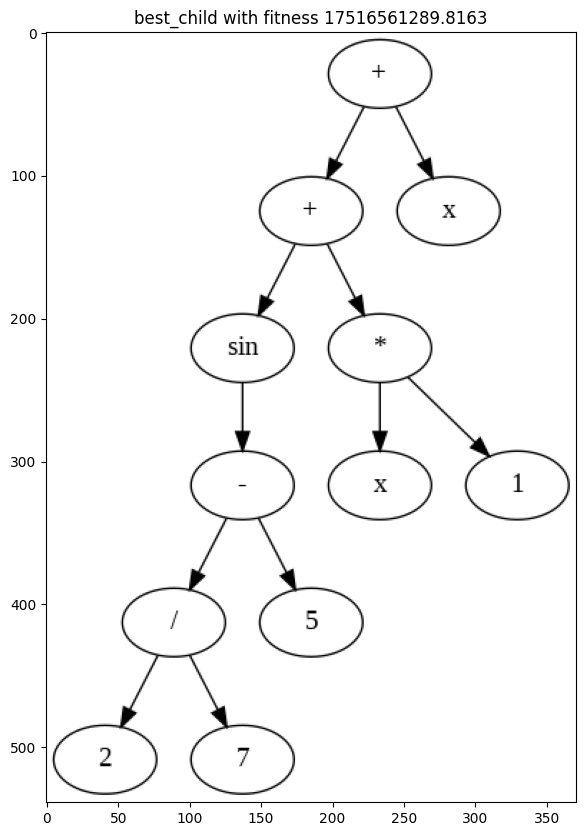

In [20]:
best_child, best_fitness = get_max_fitness_chromosome(best_generation, func, vars)
print("Best Fitness:", best_fitness)
print("Best Chromosome:", best_child)

dot = best_child.visualize_tree()
dot.render(f'best_child', format='png', cleanup=True)
img = Image.open(f'best_child.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'best_child with fitness {best_fitness}')
plt.show()

In [21]:
def calculate_mse(chromosome, points, func):
    predicted_values = [chromosome.evaluate(chromosome.root, point) for point in points]
    actual_values = [func(point['x'], point['y'], point['z']) for point in points]

    # Calculate squared differences between predicted and actual values
    squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]

    # Calculate the mean squared error
    mse = sum(squared_errors) / len(points)
    return mse

In [22]:
mse = calculate_mse(best_child, points, func)
print("MSE:", mse)

MSE: 2.8544415295180506e-09


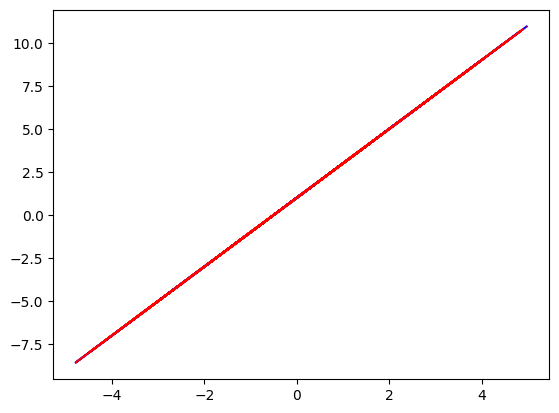

In [65]:
x_values = [entry['x'] for entry in points]
y_values = [entry['y'] for entry in points]
z_values = [entry['z'] for entry in points]


predicted_values = [best_child.evaluate(best_child.root, point) for point in points]
actual_values = np.array([func(point['x'], point['y'], point['z']) for point in points])
plt.plot(x_values,actual_values,color='blue')
plt.plot(x_values,predicted_values,color='red',linestyle = 'dashed')
plt.show()



> Now I want to do the same thing for my second 2dimensional function $2x+sin(y)$, first I make the initial chromosomes, then i will crossover and mutate them for generations then i will show the best chromosome and its MSE:



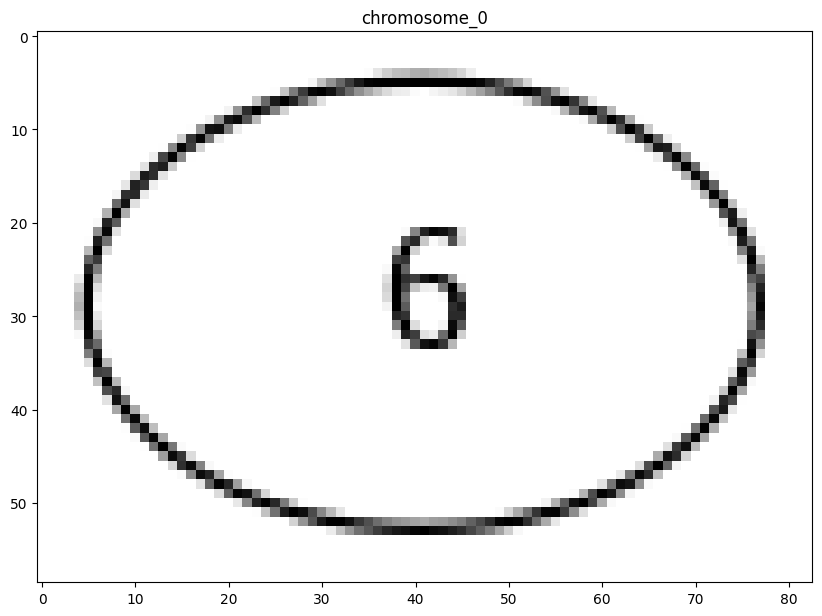

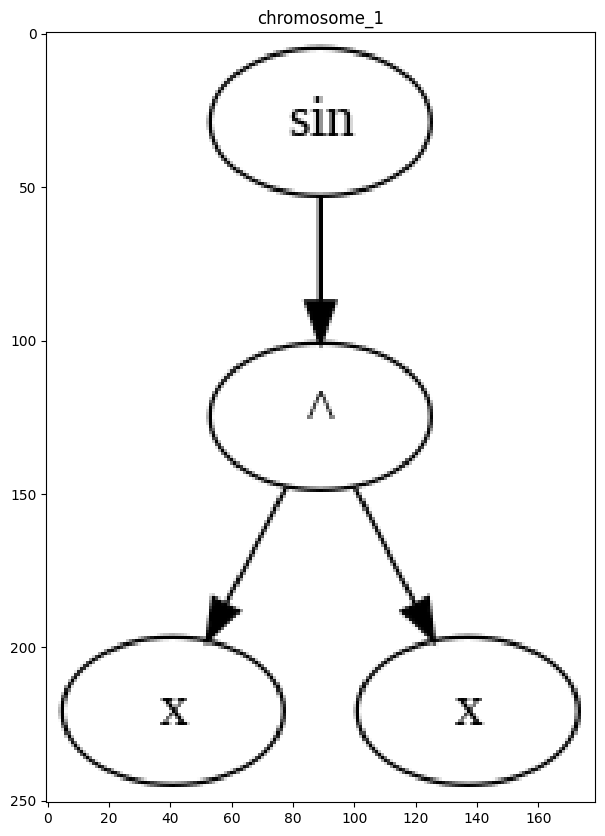

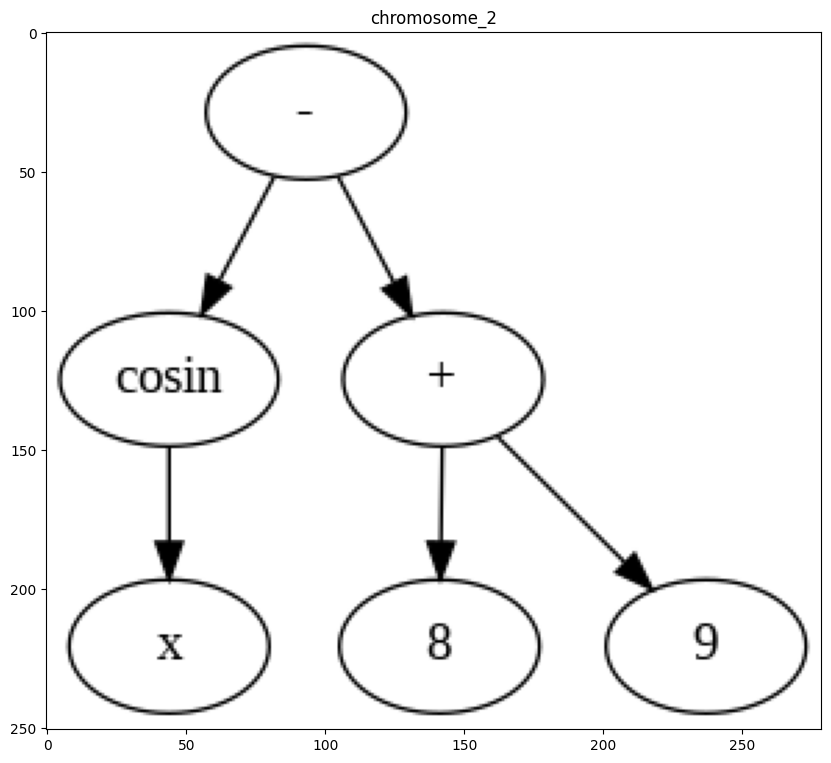

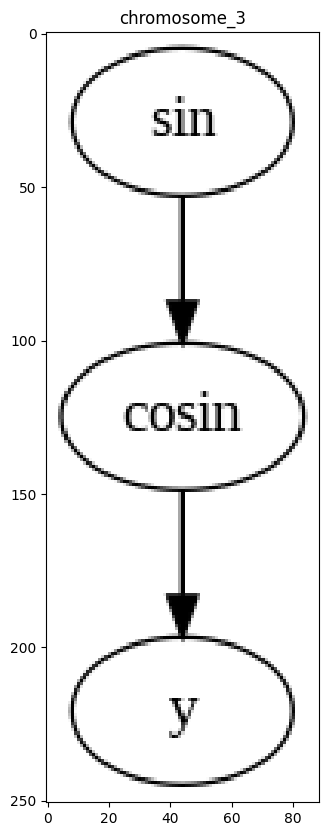

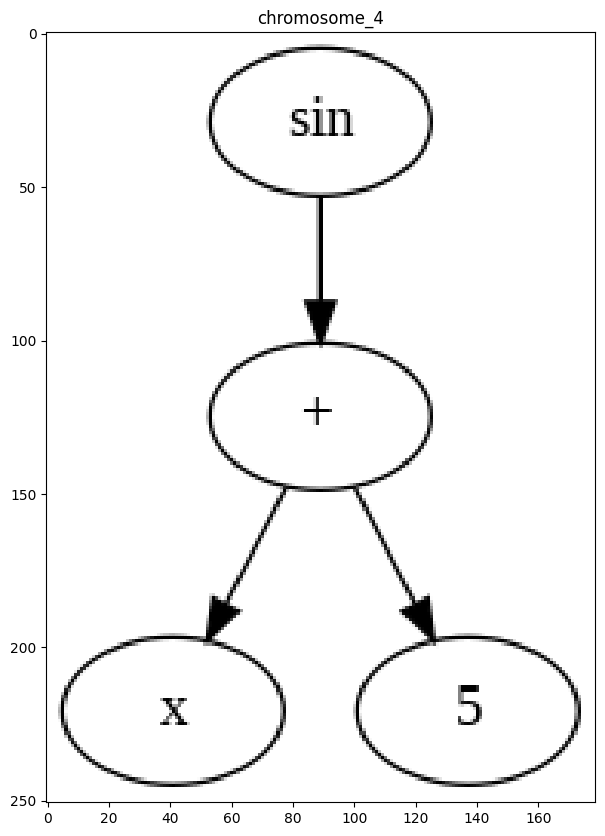

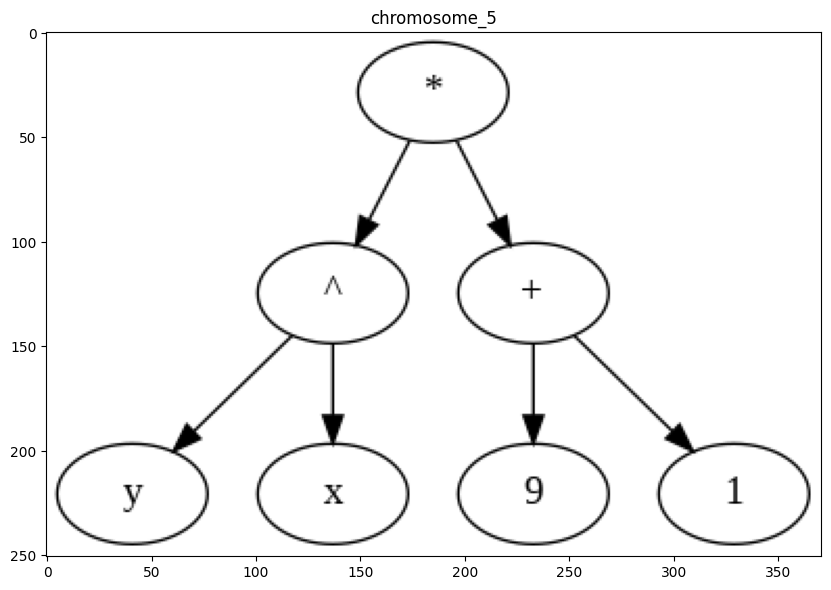

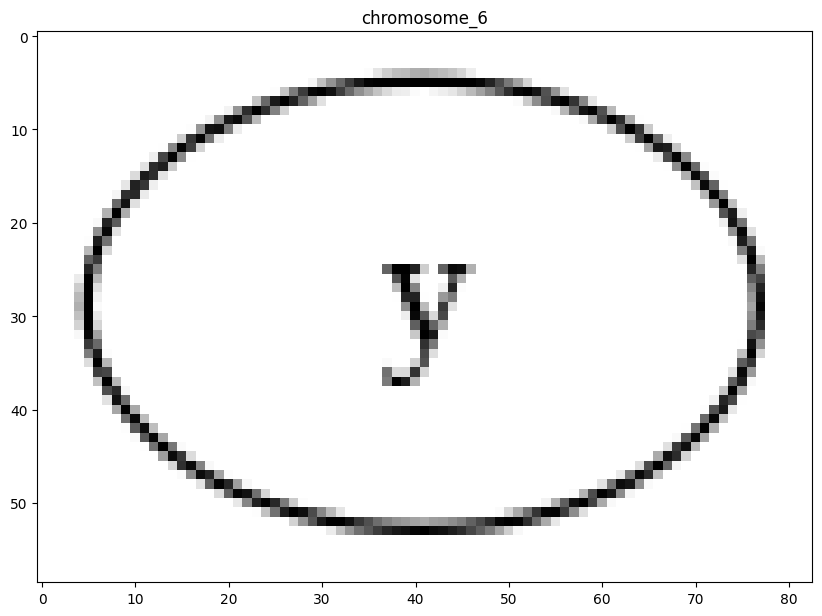

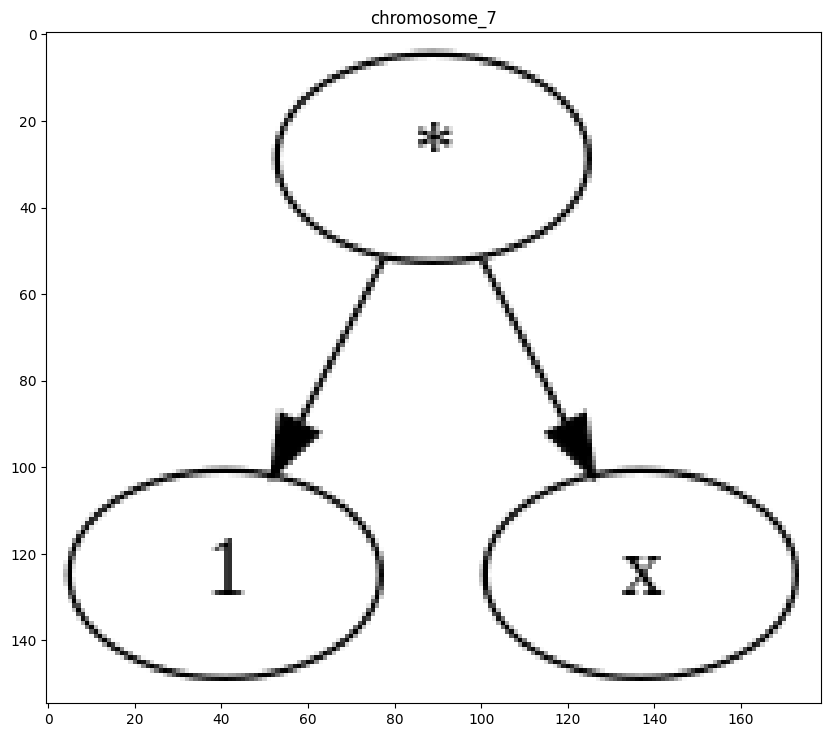

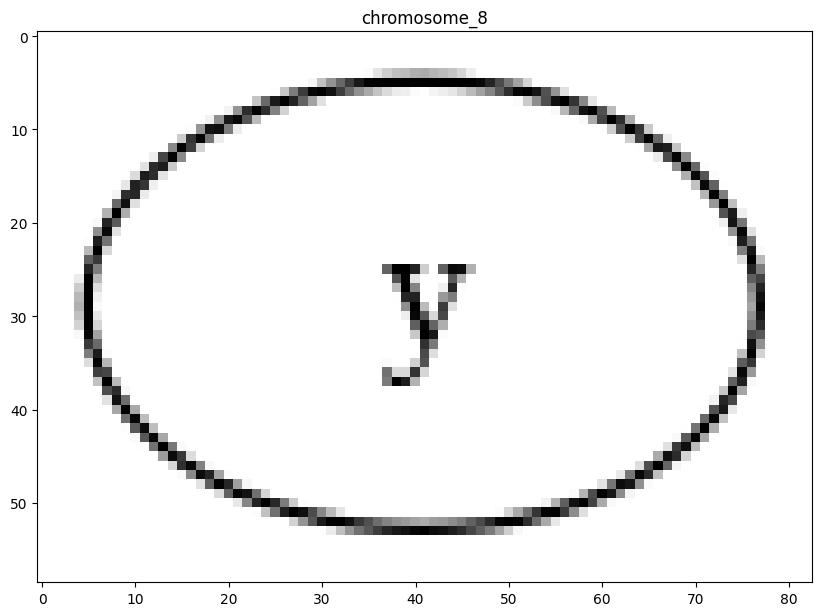

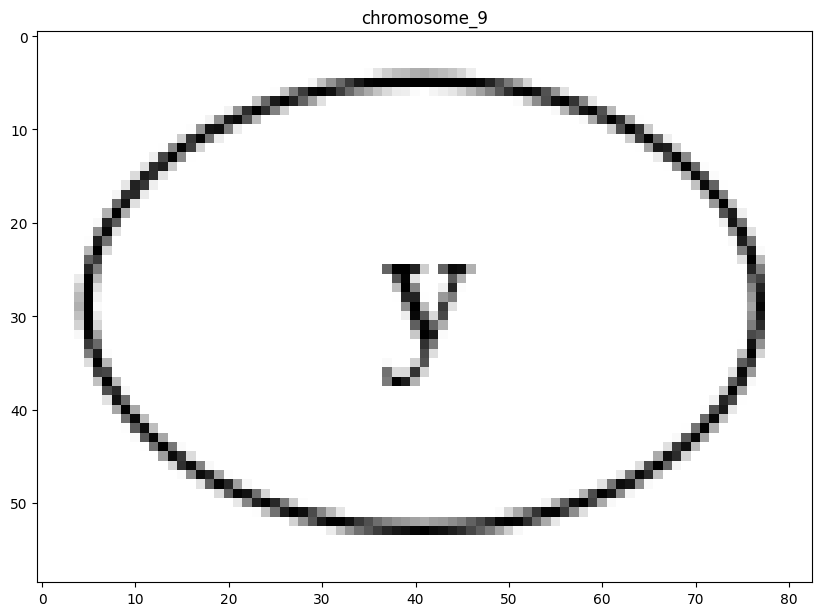

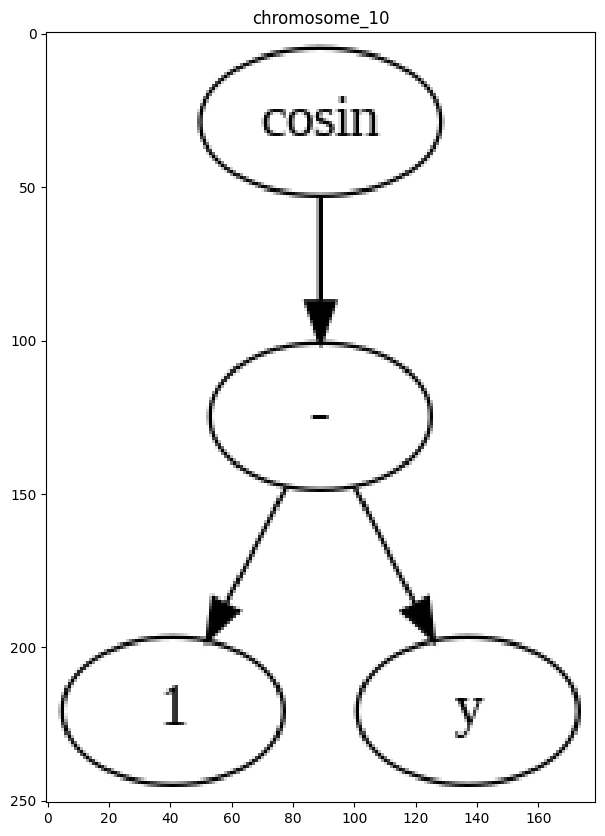

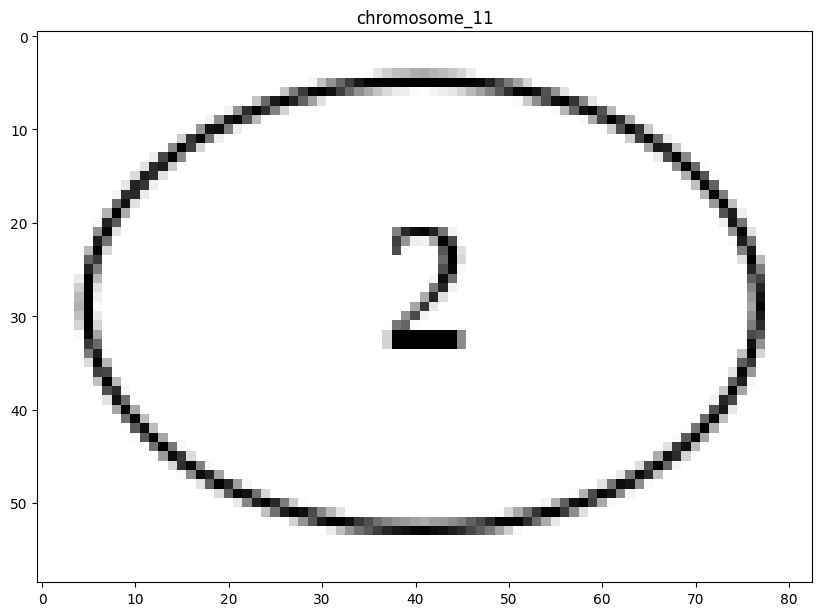

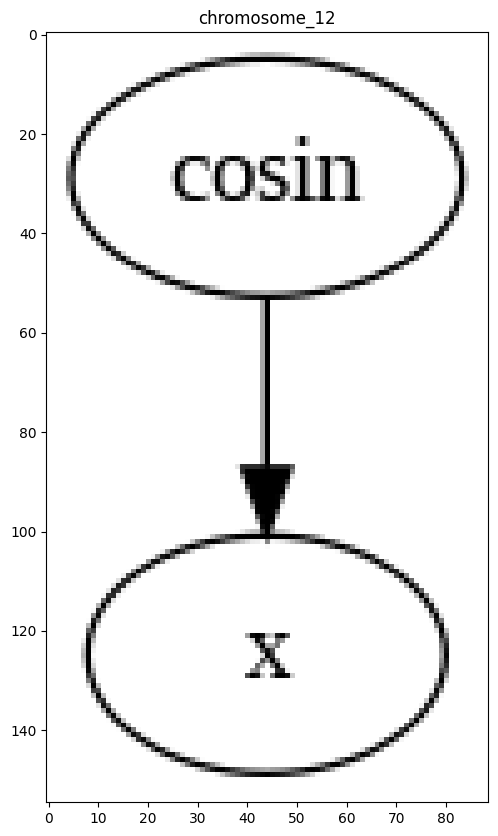

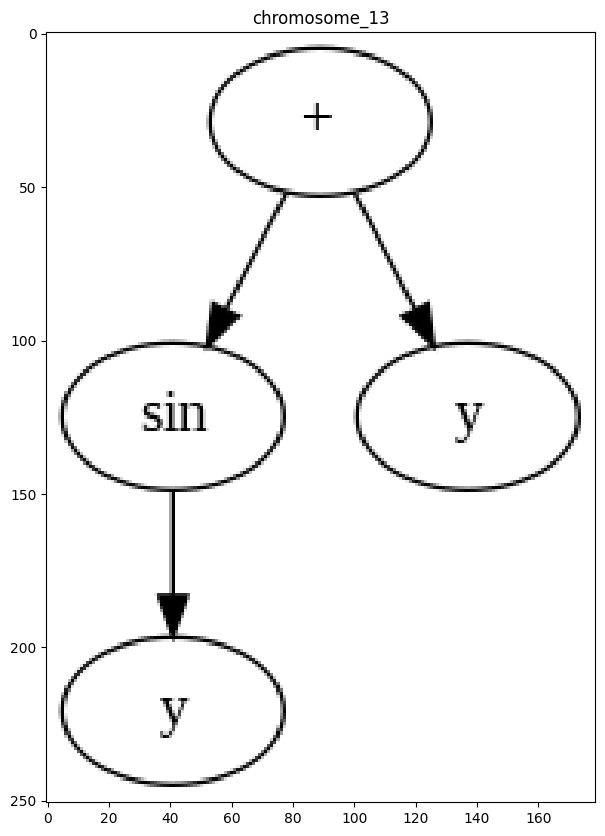

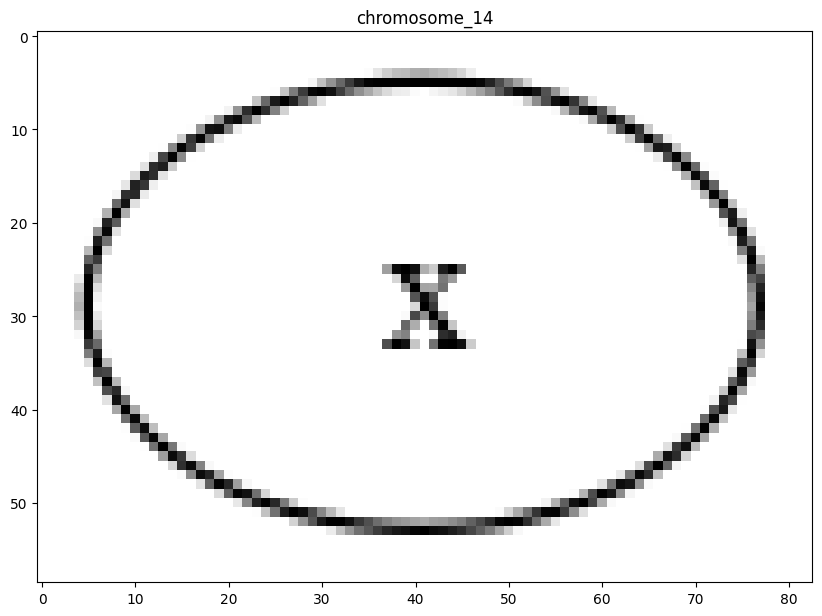

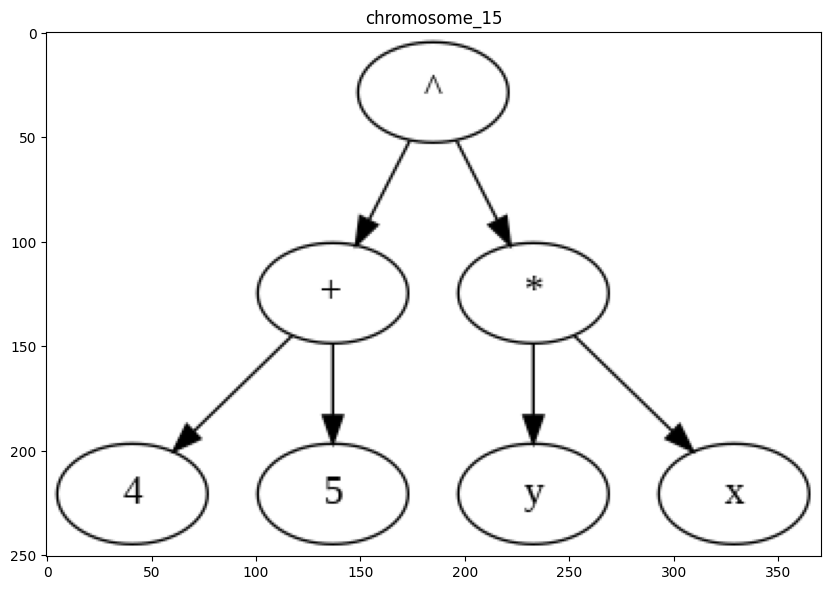

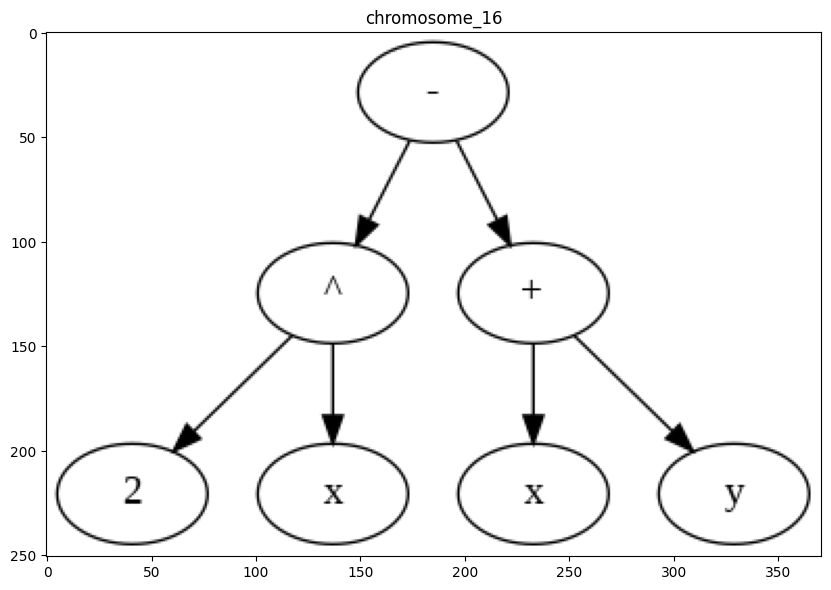

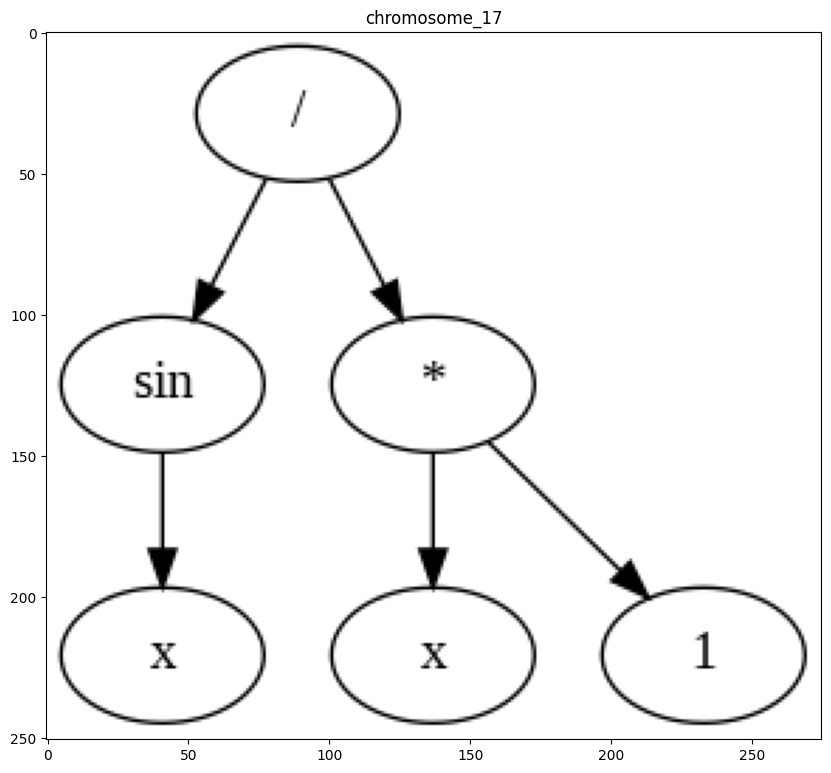

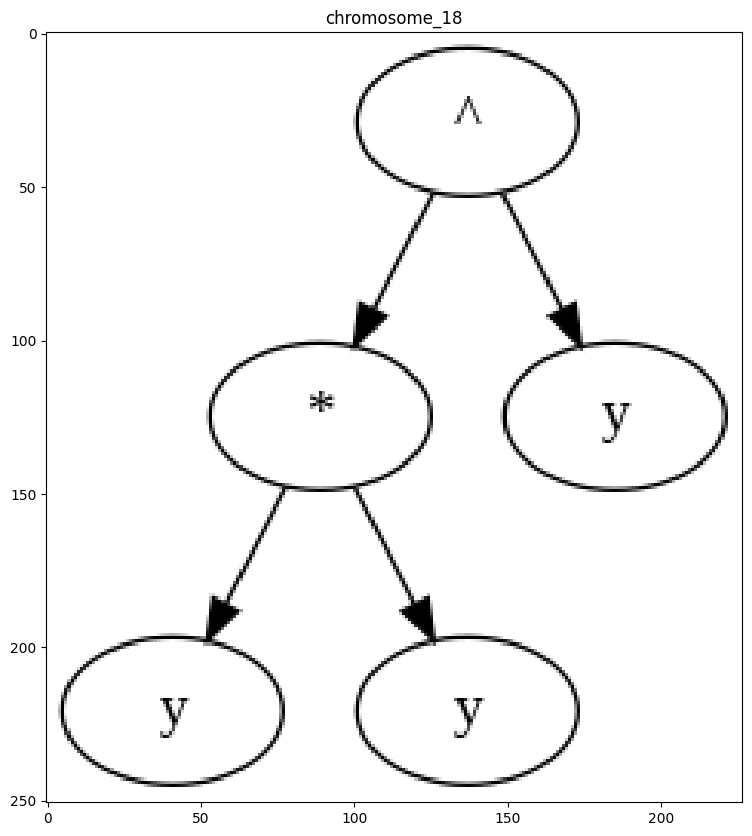

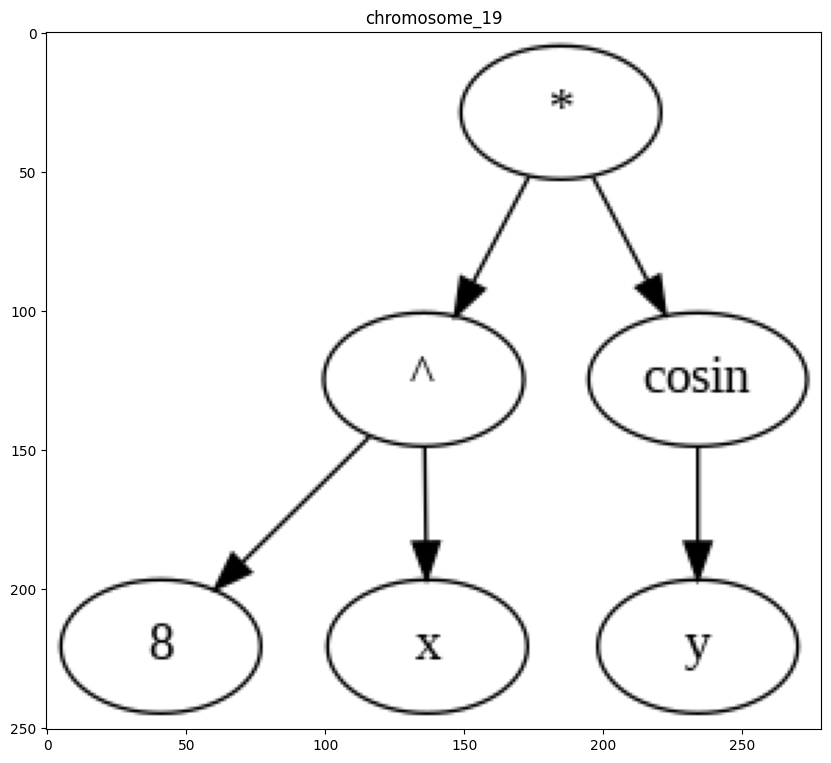

In [53]:
depth = 2
vars = ['x','y']
num_chromosomes = 20

chromosomes2dim = []

for i in range(num_chromosomes):
    chromosomes2dim.append(Chromosome(depth, vars))
    dot = chromosomes2dim[i].visualize_tree()
    dot.render(f'chromosome_{i}', format='png', cleanup=True)
    img = Image.open(f'chromosome_{i}.png')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    plt.title(f'chromosome_{i}')
    plt.show()

In [54]:
fitnesses2dim = []
for chromosome in chromosomes2dim:
  fitnesses2dim.append(chromosome.evalFitness(points,func2dim))

print(fitnesses2dim)

[0.7903, 1.4875, 0.1402, 1.4345, 1.4021, 0.0, 1.0141, 5.5288, 1.0141, 1.0141, 1.4534, 1.3807, 1.4185, 1.051, 5.5288, 0.0, 0.975, 1.4464, 0.0, 0.0]


In [55]:
selected_chromosomes2dim = select_chromosomes(chromosomes2dim,fitnesses2dim)
for item in selected_chromosomes2dim:
  print(f'chromosome {chromosomes2dim.index(item["chromosome"])} Fitness : {item["fitness"]}')

chromosome 14 Fitness : 5.5288
chromosome 8 Fitness : 1.0141
chromosome 4 Fitness : 1.4021
chromosome 6 Fitness : 1.0141
chromosome 3 Fitness : 1.4345
chromosome 16 Fitness : 0.975
chromosome 7 Fitness : 5.5288
chromosome 9 Fitness : 1.0141
chromosome 1 Fitness : 1.4875
chromosome 10 Fitness : 1.4534


In [56]:
best_generation2dim = evolve_population(chromosomes2dim,fitnesses2dim,func2dim,vars)

Generation 0 has an average fitness of 1.2253733333333334
Generation 1 has an average fitness of 1.8593344444444442
Generation 2 has an average fitness of 4.762622222222221


<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))


Generation 3 has an average fitness of 7.182865555555556
Generation 4 has an average fitness of 376493681.9525489
Generation 5 has an average fitness of 376493686.1176878
Generation 6 has an average fitness of 752987420.4996067
Generation 7 has an average fitness of 1882468384.3501465
Generation 8 has an average fitness of 1505974792.32848
Generation 9 has an average fitness of 1129481122.57782
Generation 10 has an average fitness of 1505974778.24456
Generation 11 has an average fitness of 1505974729.0964165
Generation 12 has an average fitness of 1129481072.9311955
Generation 13 has an average fitness of 466809998.1057555
Generation 14 has an average fitness of 752987349.6339934
Generation 15 has an average fitness of 1505974730.3869314
Generation 16 has an average fitness of 1505974730.8176823
Generation 17 has an average fitness of 2318976357.646015
Generation 18 has an average fitness of 752987393.2877023
Generation 19 has an average fitness of 376493698.9180667
Generation 20 has a

<ipython-input-21-fc53ed4af587>:6: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


Generation 22 has an average fitness of 1505974701.2884178
Generation 23 has an average fitness of 1129481079.2797754
Generation 24 has an average fitness of 752987536.3849821
Generation 25 has an average fitness of 376493859.2396578
Generation 26 has an average fitness of 481014109.934561
Generation 27 has an average fitness of 813001699.4386646
Generation 28 has an average fitness of 376493808.85875785
Generation 29 has an average fitness of 254.76869888888893
best_generation returned fitness avarage : 2318976357.646015


Best Fitness: 39285717612.4296
Best Chromosome: <__main__.Chromosome object at 0x7fa6fc52cbb0>


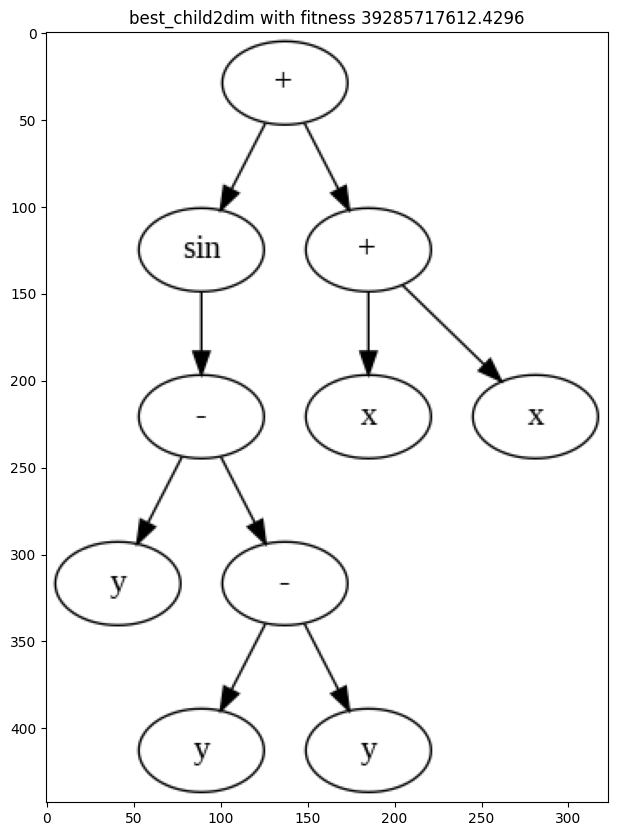

In [58]:
best_child2dim, best_fitness2dim = get_max_fitness_chromosome(best_generation2dim, func2dim, vars)
print("Best Fitness:", best_fitness2dim)
print("Best Chromosome:", best_child2dim)

dot = best_child2dim.visualize_tree()
dot.render(f'best_child2dim', format='png', cleanup=True)
img = Image.open(f'best_child2dim.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'best_child2dim with fitness {best_fitness2dim}')
plt.show()

In [59]:
mse = calculate_mse(best_child2dim, points, func2dim)
print("MSE:", mse)

MSE: 1.2727271649527054e-09


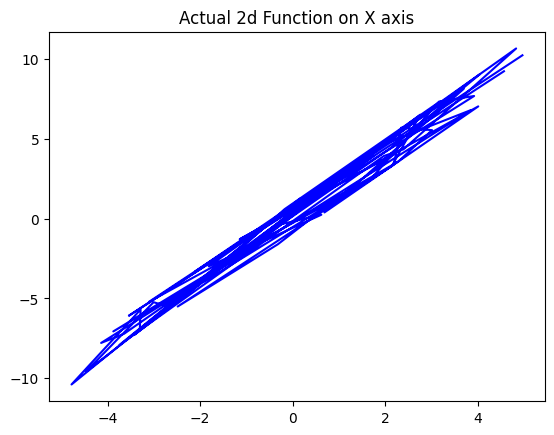

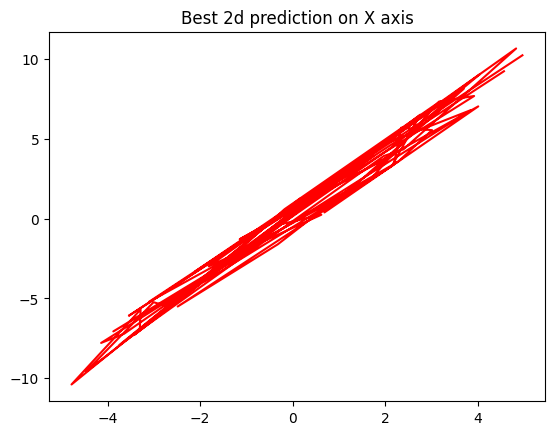

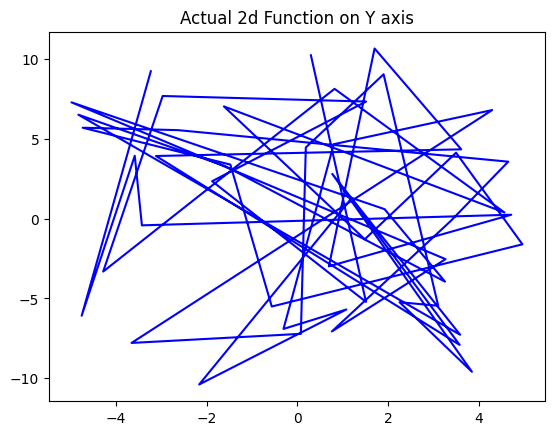

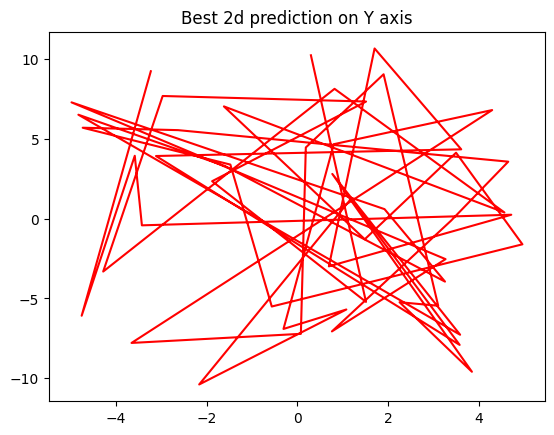

In [69]:
predicted_values = [best_child2dim.evaluate(best_child2dim.root, point) for point in points]
actual_values = np.array([func2dim(point['x'], point['y'], point['z']) for point in points])

plt.plot(x_values,actual_values,color='blue')
plt.title('Actual 2d Function on X axis')
plt.show()

plt.plot(x_values,predicted_values,color='red')
plt.title('Best 2d prediction on X axis')
plt.show()

plt.plot(y_values,actual_values,color='blue')
plt.title('Actual 2d Function on Y axis')
plt.show()

plt.plot(y_values,predicted_values,color='red')
plt.title('Best 2d prediction on Y axis')
plt.show()




> Now I want to do the same thing for my second 3dimensional function $2x+sin(y)+cos(z)$, first I make the initial chromosomes, then i will crossover and mutate them for generations then i will show the best chromosome and its MSE:



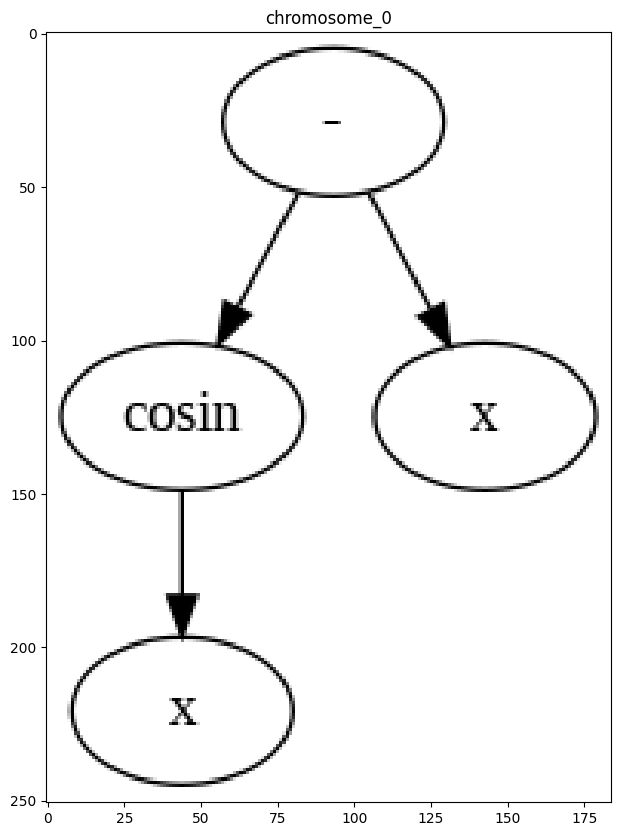

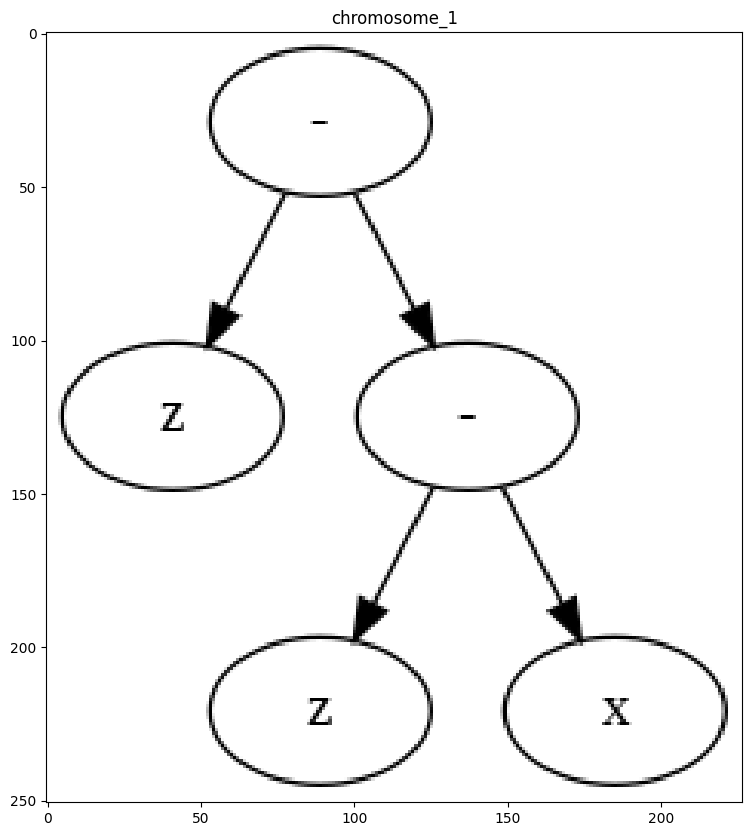

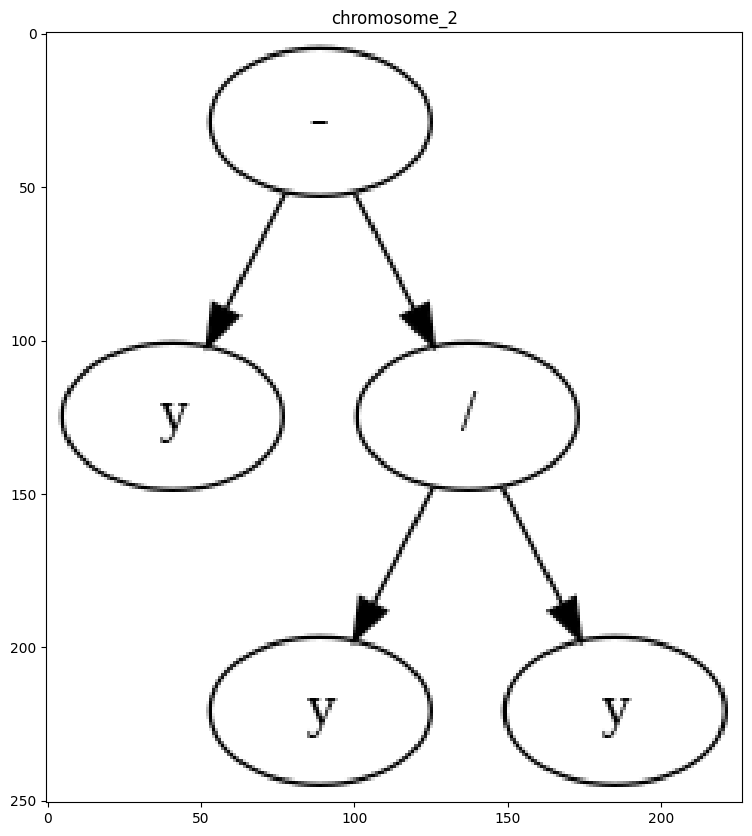

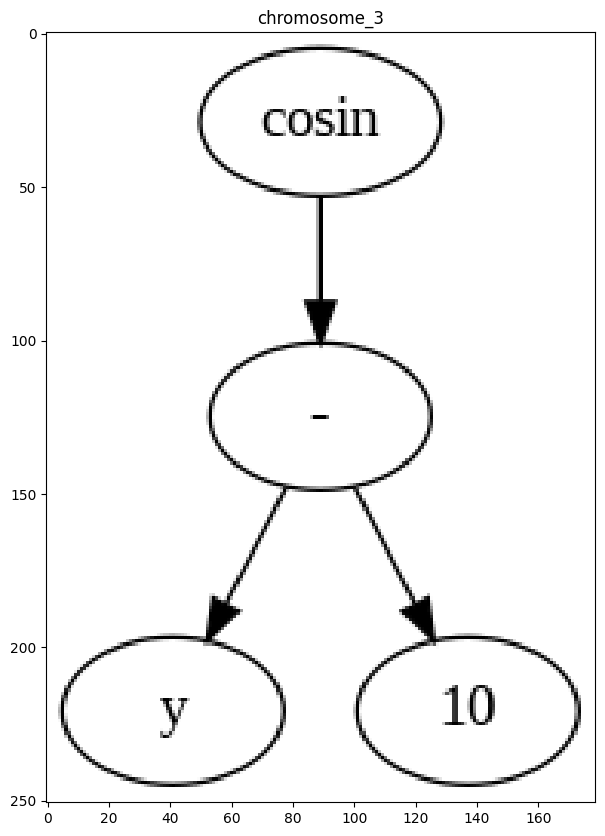

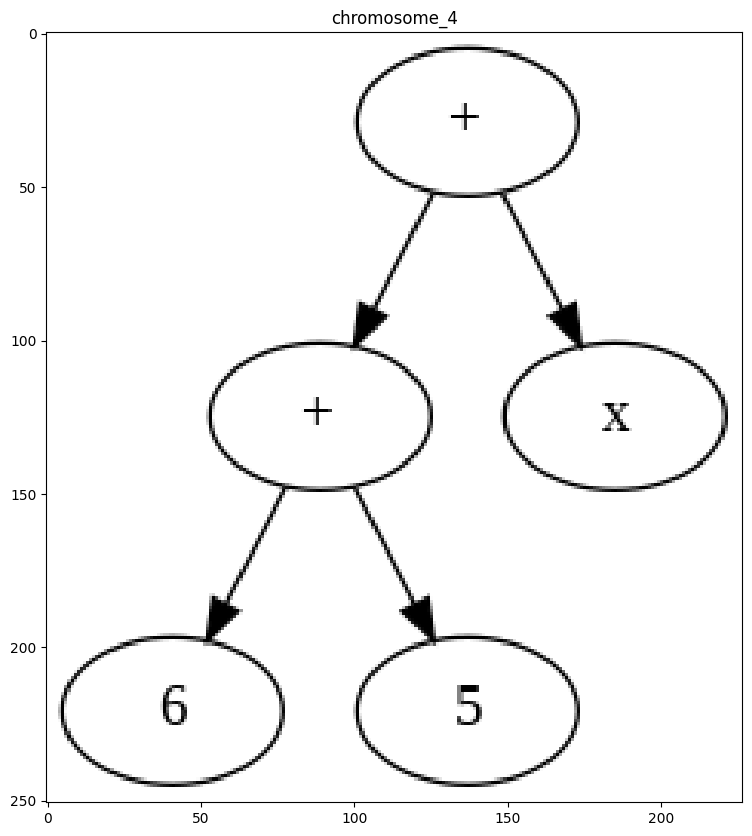

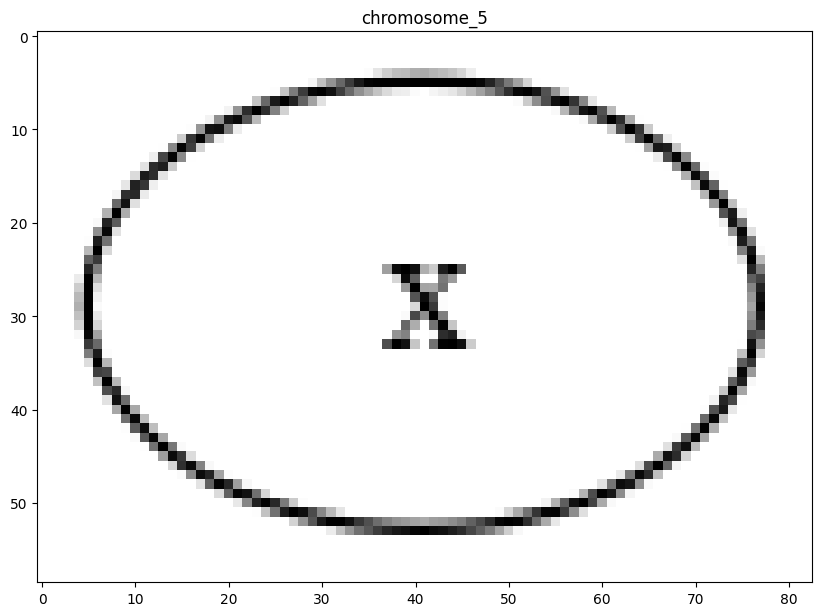

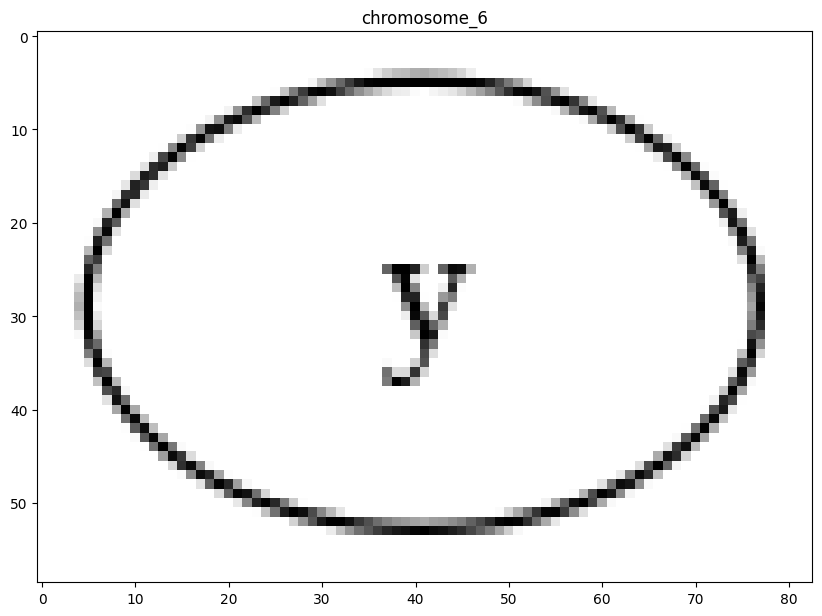

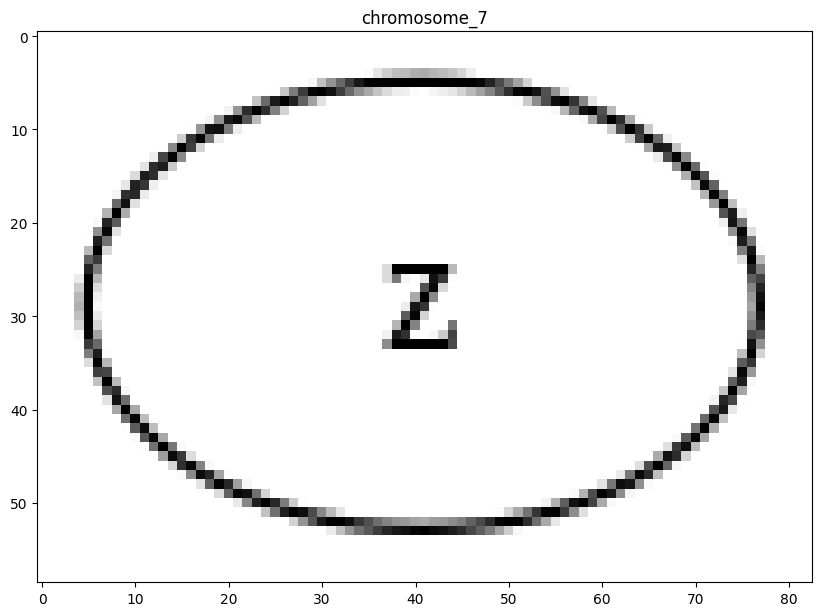

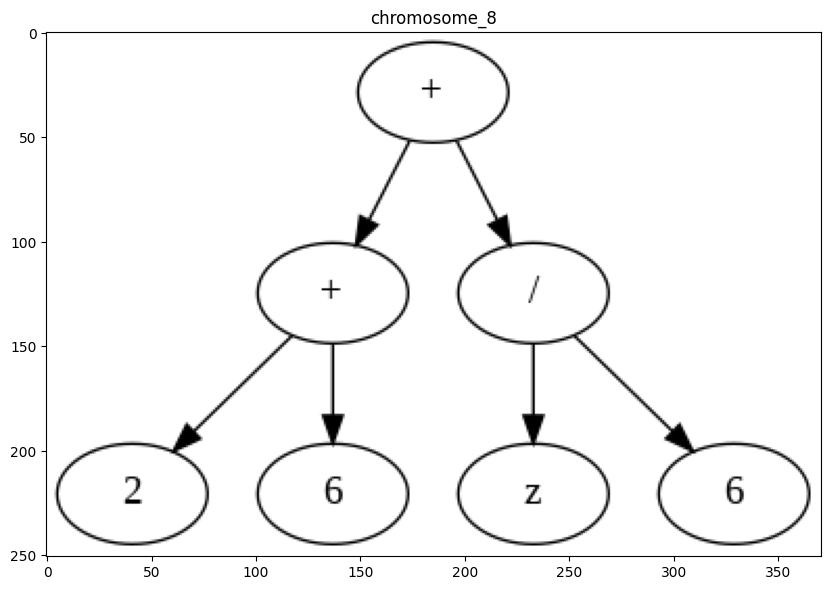

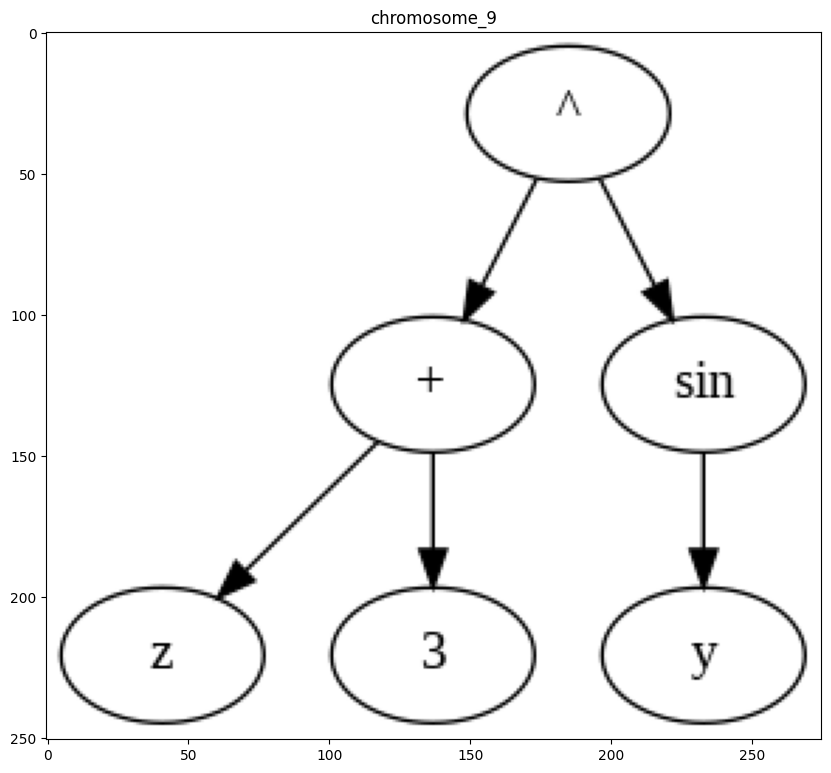

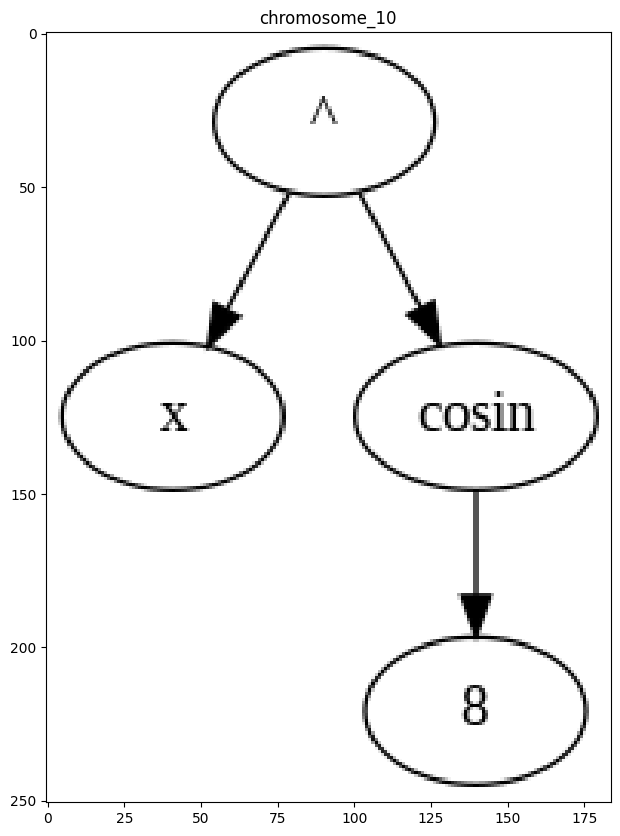

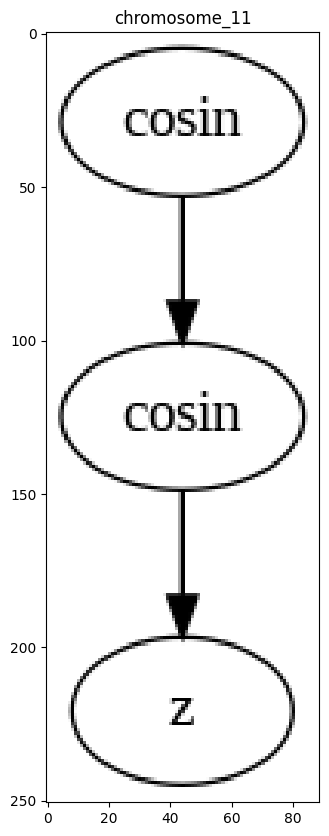

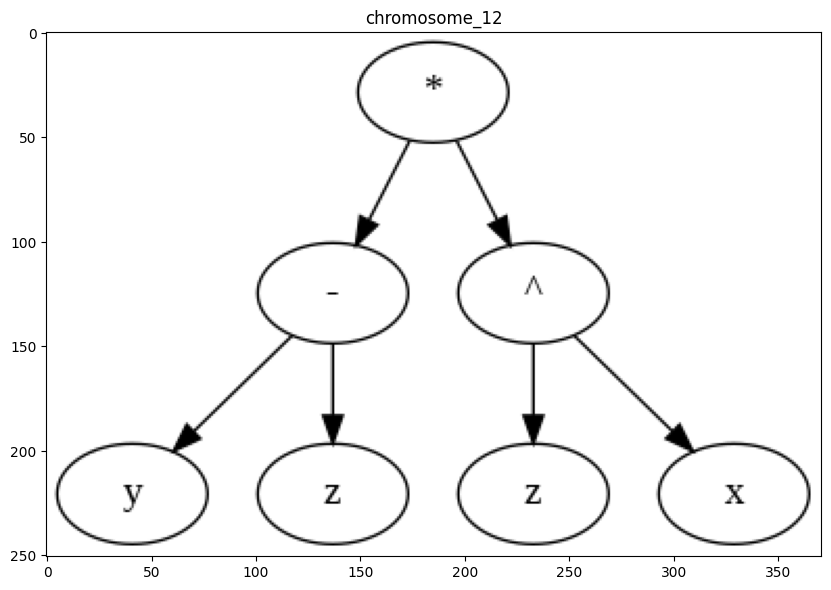

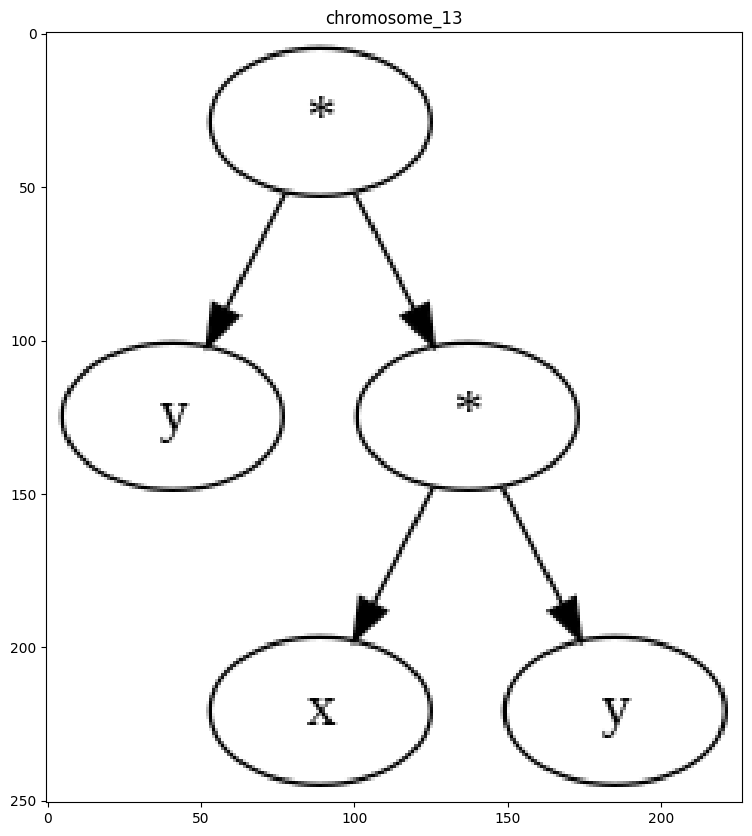

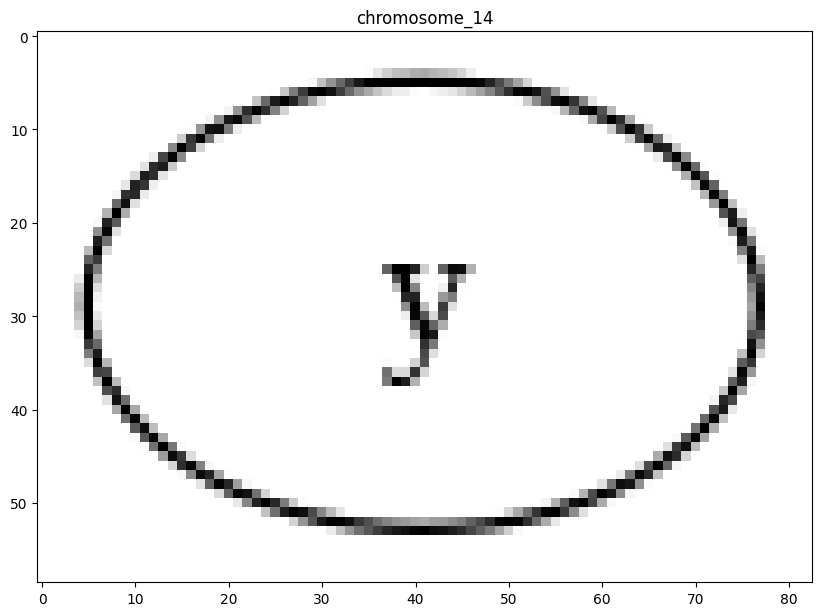

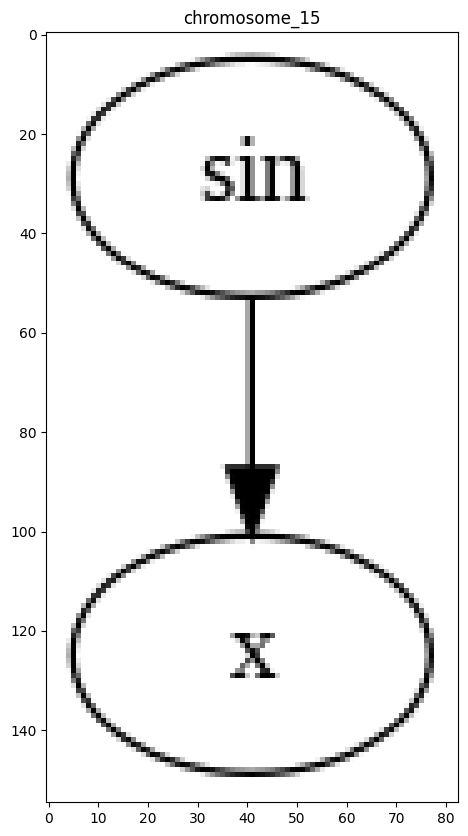

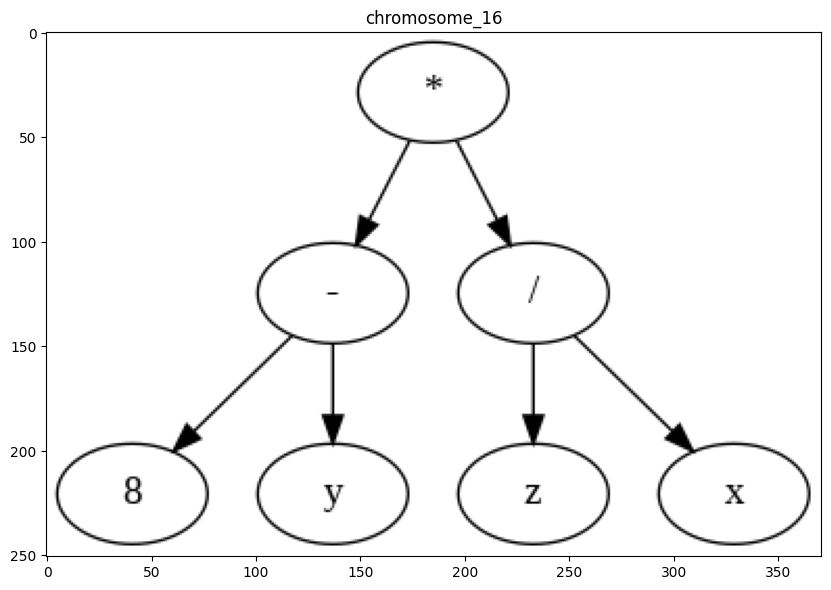

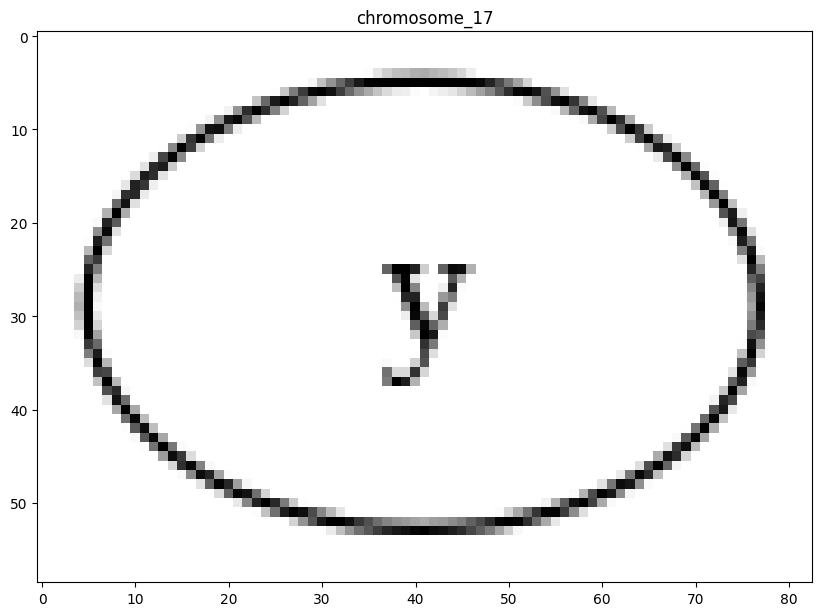

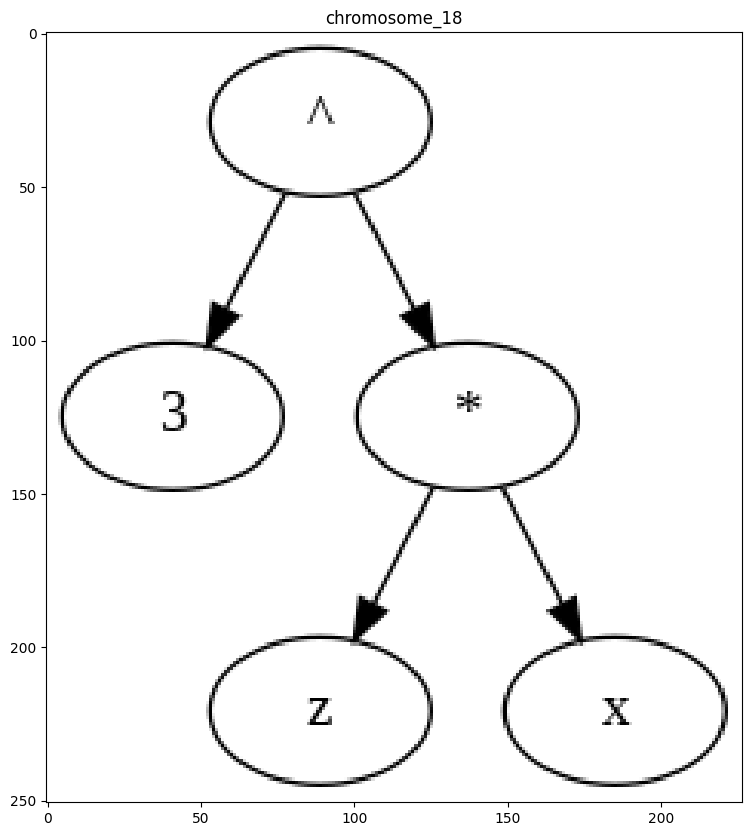

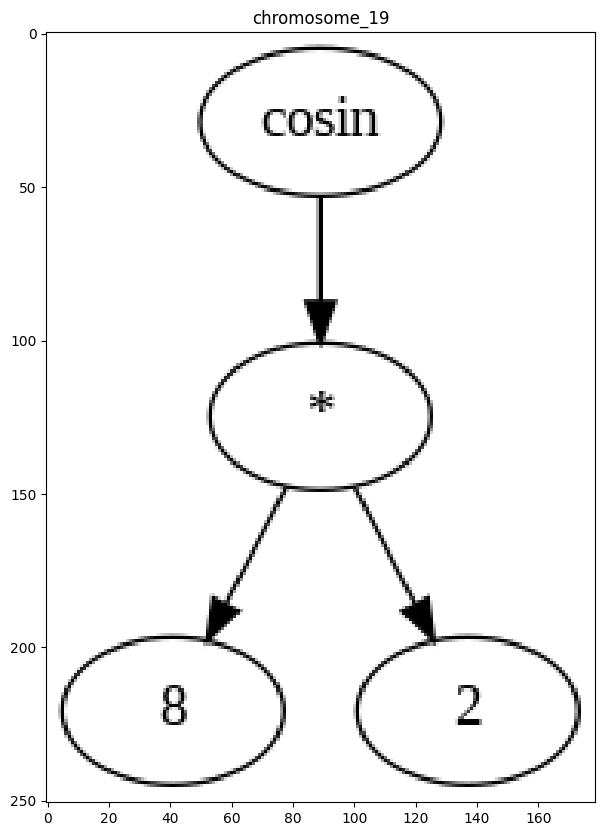

In [70]:

depth = 2
vars = ['x','y','z']
num_chromosomes = 20

chromosomes3dim = []

for i in range(num_chromosomes):
    chromosomes3dim.append(Chromosome(depth, vars))
    dot = chromosomes3dim[i].visualize_tree()
    dot.render(f'chromosome_{i}', format='png', cleanup=True)
    img = Image.open(f'chromosome_{i}.png')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    plt.title(f'chromosome_{i}')
    plt.show()

In [71]:
fitnesses3dim = []
for chromosome in chromosomes3dim:
  fitnesses3dim.append(chromosome.evalFitness(points,func3dim))

print(fitnesses3dim)

[0.6224, 4.9654, 0.9443, 1.3304, 0.3963, 4.9654, 0.9676, 1.02, 0.5375, 1.3256, 1.5623, 1.408, 0.0071, 0.0657, 0.9676, 1.2993, 0.0376, 0.9676, 0.0, 1.3057]


In [72]:
selected_chromosomes3dim = select_chromosomes(chromosomes3dim,fitnesses3dim)
for item in selected_chromosomes3dim:
  print(f'chromosome {chromosomes3dim.index(item["chromosome"])} Fitness : {item["fitness"]}')

chromosome 3 Fitness : 1.3304
chromosome 1 Fitness : 4.9654
chromosome 8 Fitness : 0.5375
chromosome 7 Fitness : 1.02
chromosome 15 Fitness : 1.2993
chromosome 17 Fitness : 0.9676
chromosome 2 Fitness : 0.9443
chromosome 5 Fitness : 4.9654
chromosome 19 Fitness : 1.3057
chromosome 0 Fitness : 0.6224


In [73]:
best_generation3dim = evolve_population(chromosomes3dim,fitnesses3dim,func3dim,vars)

Generation 0 has an average fitness of 1.3695077777777778
Generation 1 has an average fitness of 1.7806344444444446


<ipython-input-21-fc53ed4af587>:6: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


Generation 2 has an average fitness of 1.24755
Generation 3 has an average fitness of 1.5295733333333337
Generation 4 has an average fitness of 5.736973333333333
Generation 5 has an average fitness of 7.6722044444444455
Generation 6 has an average fitness of 9.907708888888887
Generation 7 has an average fitness of 14.037503333333332


<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))


Generation 8 has an average fitness of 13.456263333333332
Generation 9 has an average fitness of 20.042366666666666
Generation 10 has an average fitness of 17.96862888888889
Generation 11 has an average fitness of 19.23715222222222
Generation 12 has an average fitness of 26.646508888888885
Generation 13 has an average fitness of 27.32264888888889
Generation 14 has an average fitness of 23.026996666666662
Generation 15 has an average fitness of 21.248321111111114
Generation 16 has an average fitness of 23.28824777777778
Generation 17 has an average fitness of 22.667055555555557
Generation 18 has an average fitness of 18.78195666666667
Generation 19 has an average fitness of 18.863682222222224
Generation 20 has an average fitness of 24.743318888888886
Generation 21 has an average fitness of 26.021292222222222
Generation 22 has an average fitness of 17.494866666666667
Generation 23 has an average fitness of 22.134436666666666
Generation 24 has an average fitness of 20.62744888888889
Gener

Best Fitness: 97.9559
Best Chromosome: <__main__.Chromosome object at 0x7fa6fc4498a0>


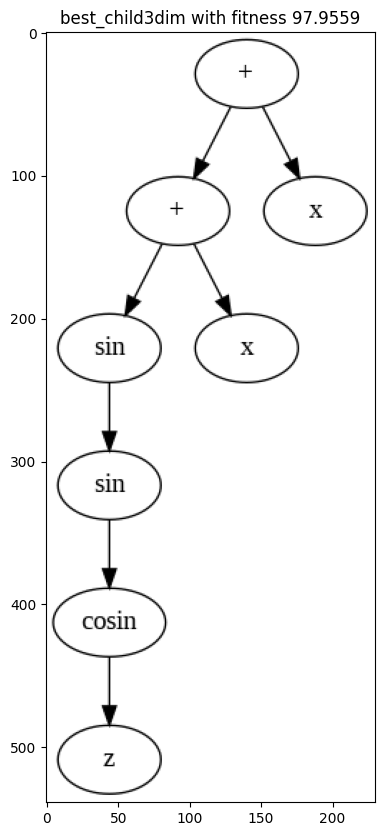

In [74]:
best_child3dim, best_fitness3dim = get_max_fitness_chromosome(best_generation3dim, func3dim, vars)
print("Best Fitness:", best_fitness3dim)
print("Best Chromosome:", best_child3dim)

dot = best_child3dim.visualize_tree()
dot.render(f'best_child3dim', format='png', cleanup=True)
img = Image.open(f'best_child3dim.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'best_child3dim with fitness {best_fitness3dim}')
plt.show()

In [75]:
mse = calculate_mse(best_child3dim, points, func3dim)
print("MSE:", mse)

MSE: 0.5104336477986994


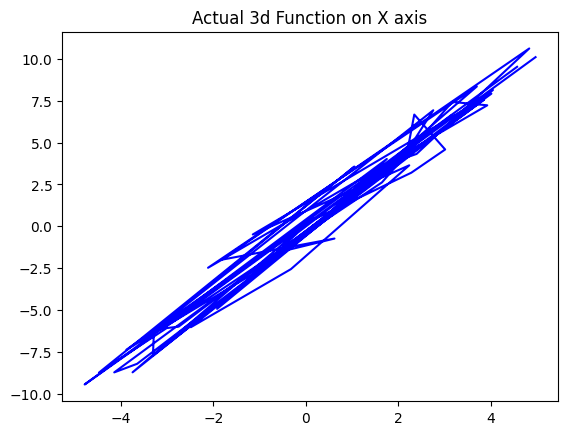

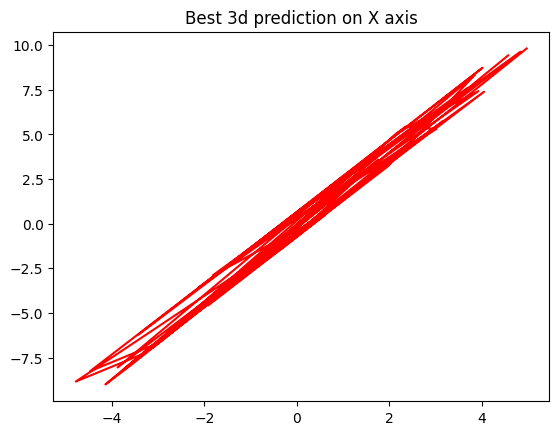

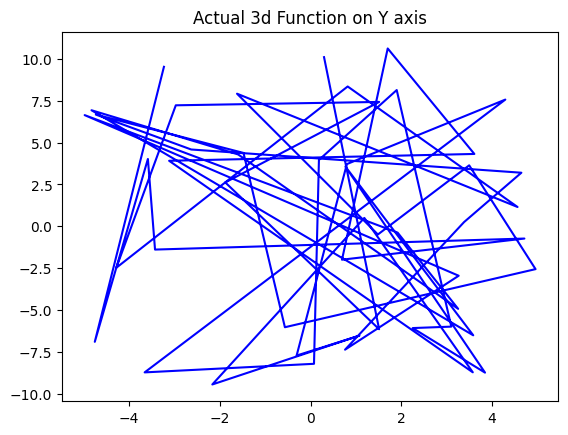

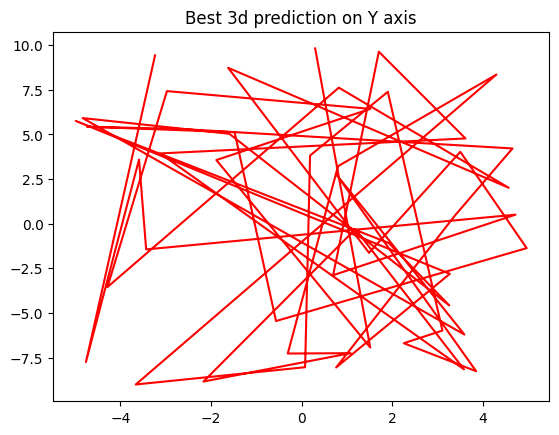

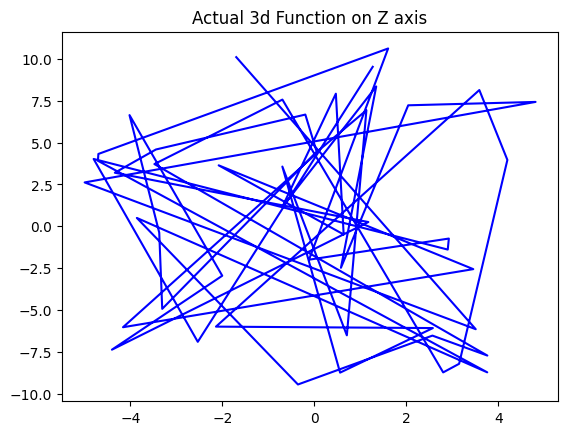

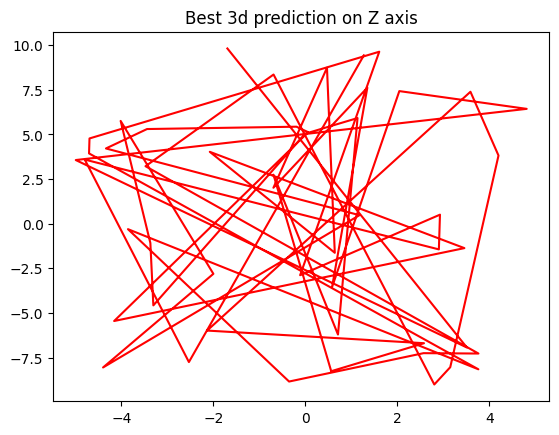

In [76]:
predicted_values = [best_child3dim.evaluate(best_child3dim.root, point) for point in points]
actual_values = np.array([func3dim(point['x'], point['y'], point['z']) for point in points])

plt.plot(x_values,actual_values,color='blue')
plt.title('Actual 3d Function on X axis')
plt.show()

plt.plot(x_values,predicted_values,color='red')
plt.title('Best 3d prediction on X axis')
plt.show()

plt.plot(y_values,actual_values,color='blue')
plt.title('Actual 3d Function on Y axis')
plt.show()

plt.plot(y_values,predicted_values,color='red')
plt.title('Best 3d prediction on Y axis')
plt.show()

plt.plot(z_values,actual_values,color='blue')
plt.title('Actual 3d Function on Z axis')
plt.show()

plt.plot(z_values,predicted_values,color='red')
plt.title('Best 3d prediction on Z axis')
plt.show()



> Now I want to do the same thing for my 4th function which contains exp() operation which does not exist in my genes $x+e^x$, first I make the initial chromosomes, then i will crossover and mutate them for generations then i will show the best chromosome and its MSE:



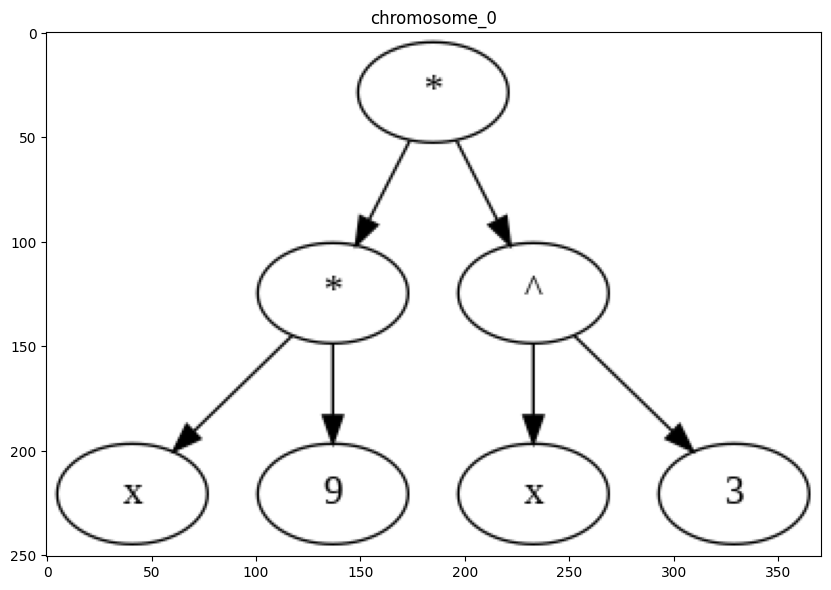

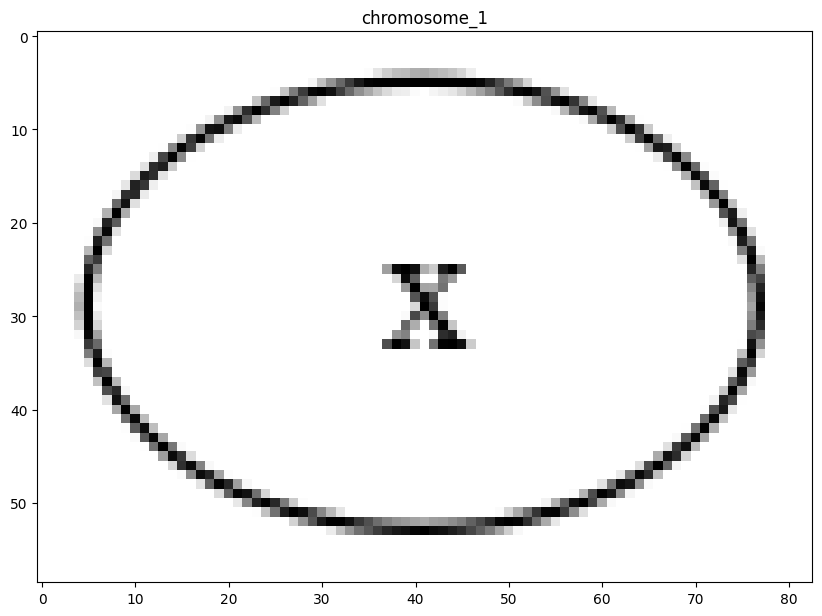

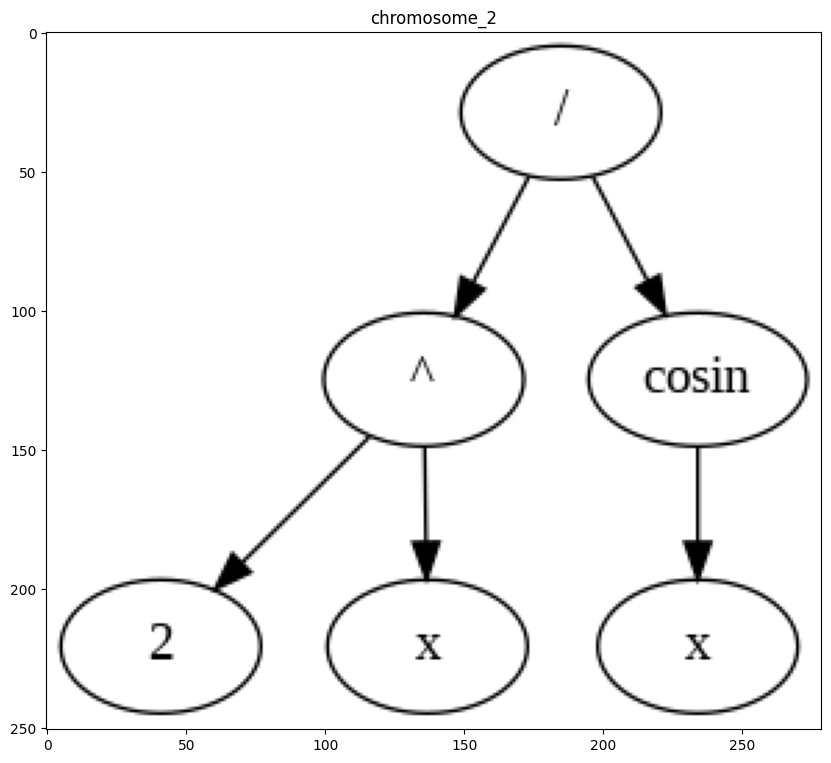

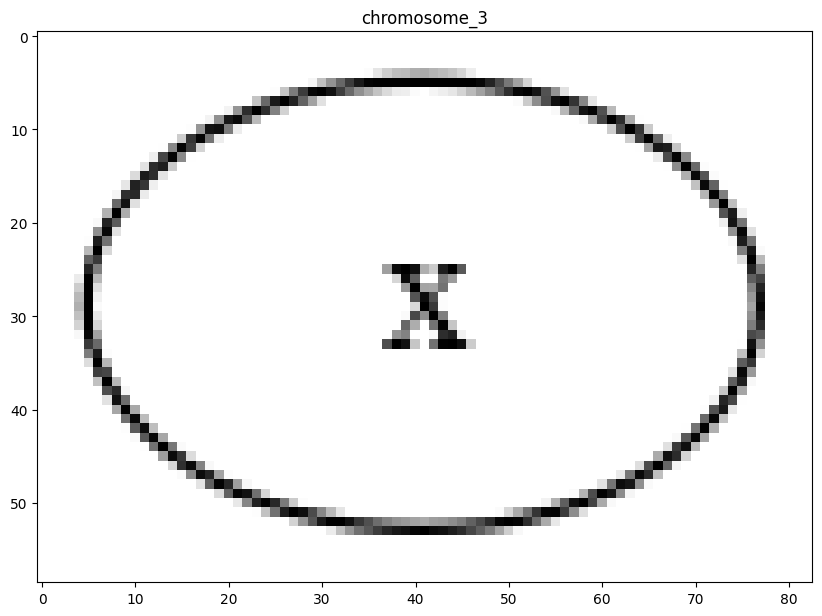

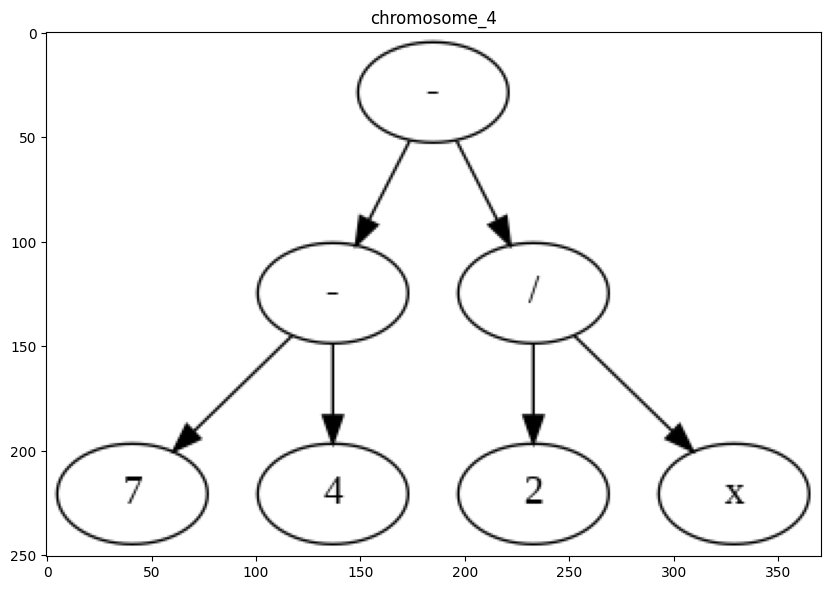

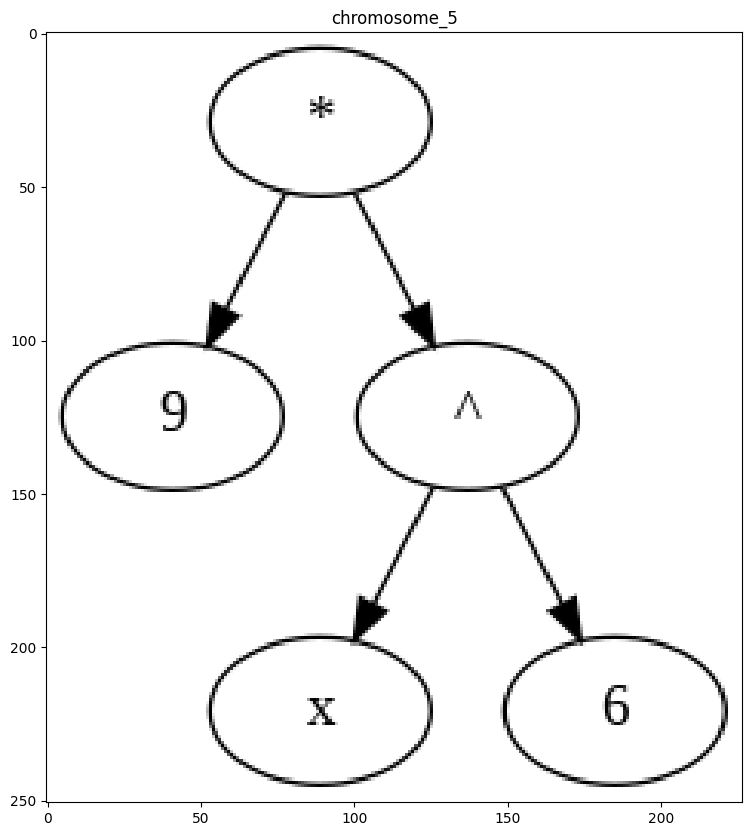

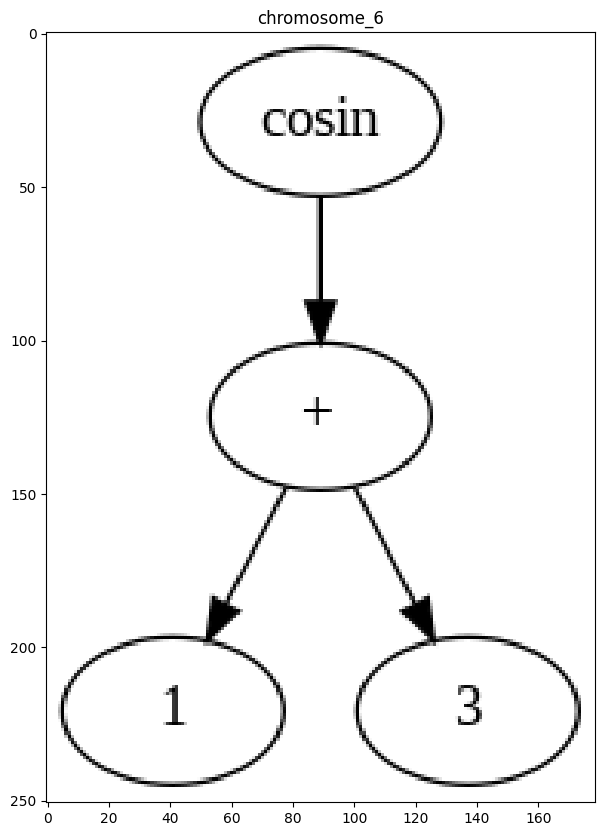

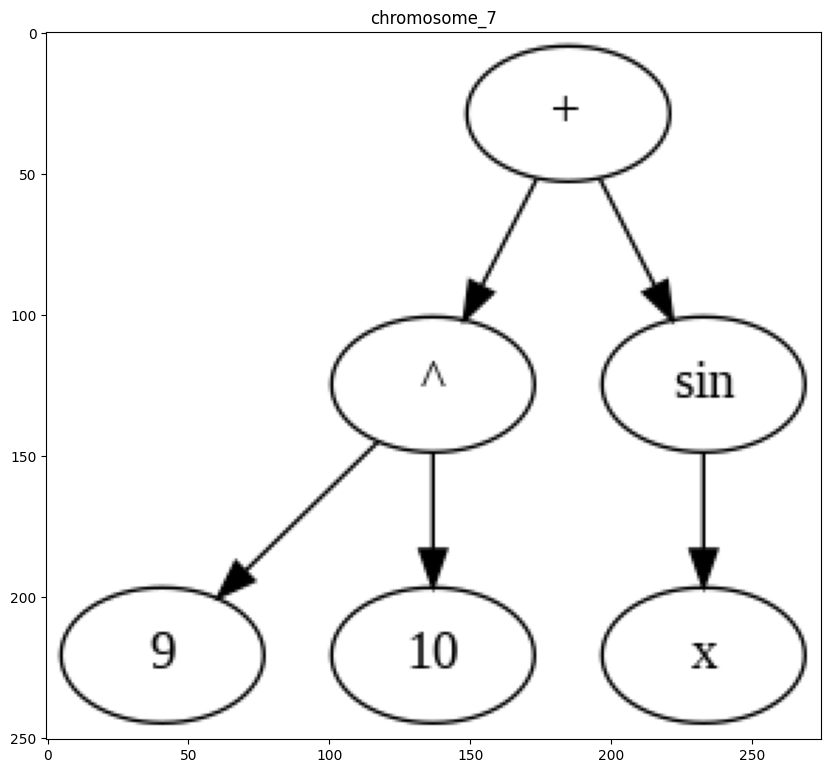

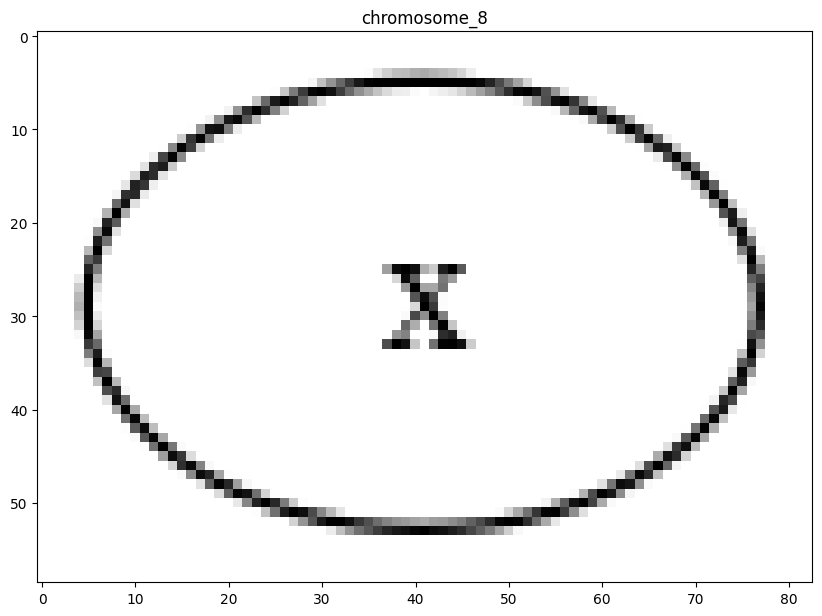

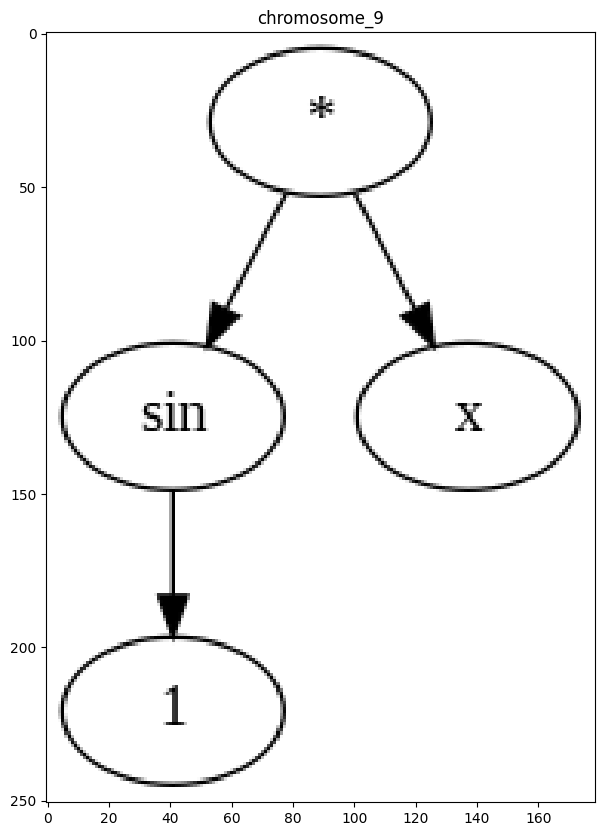

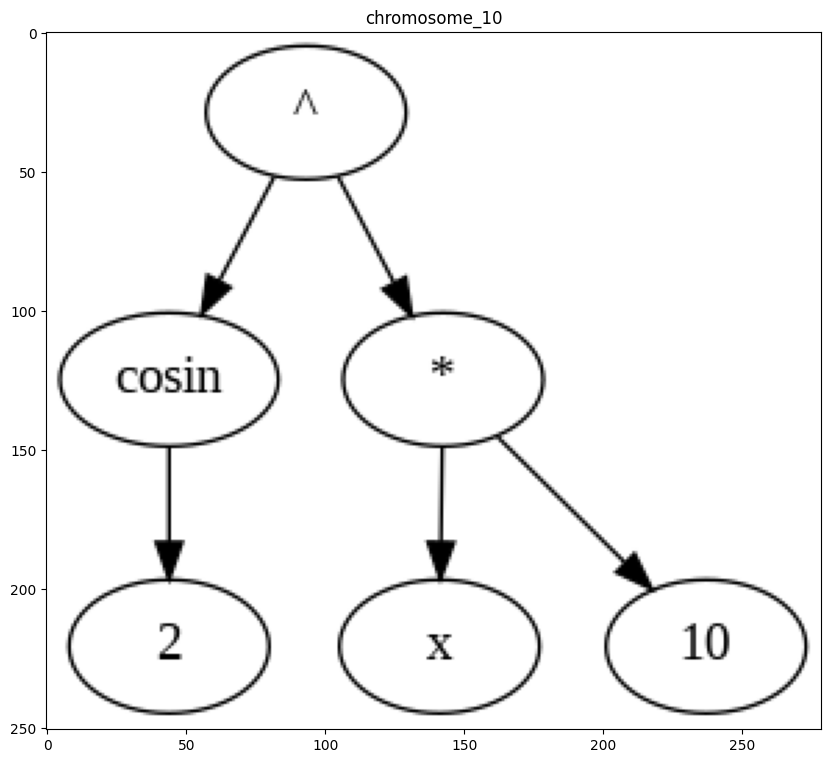

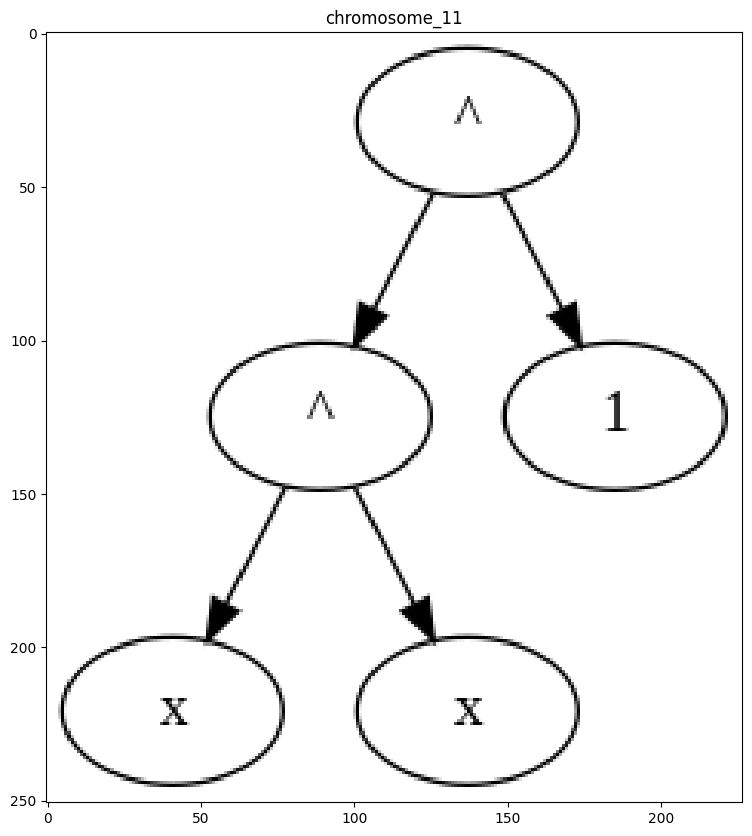

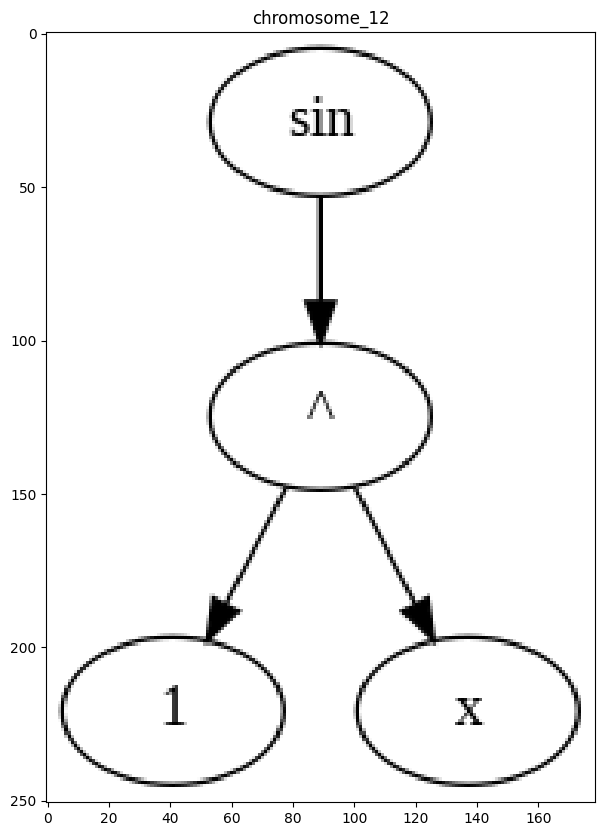

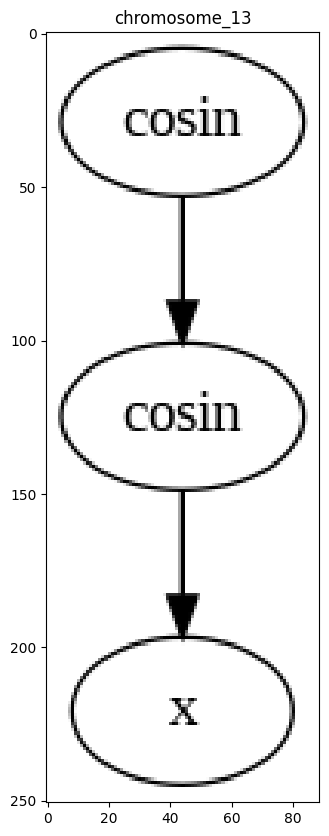

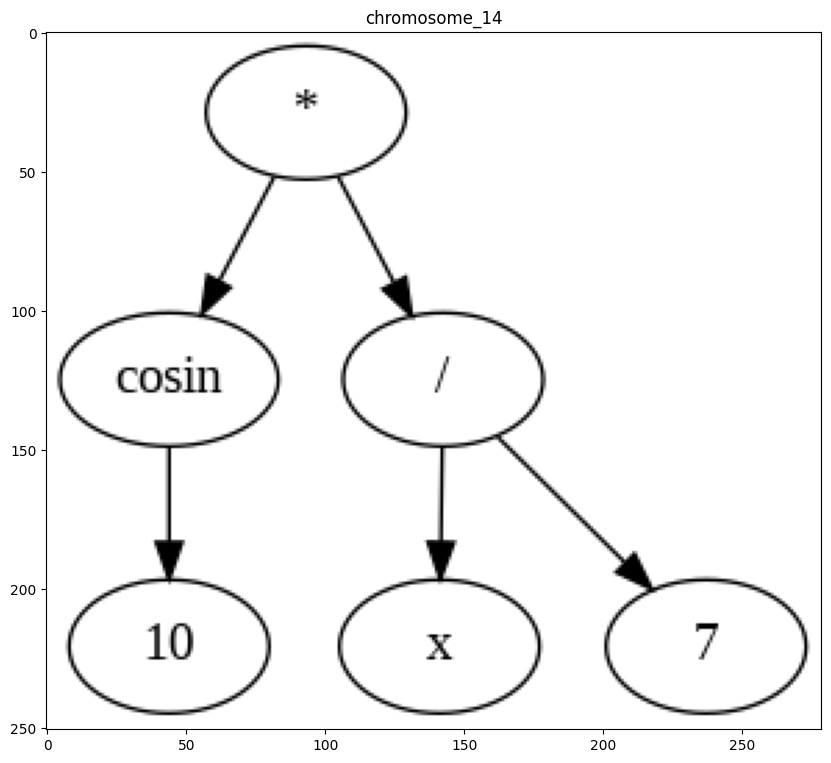

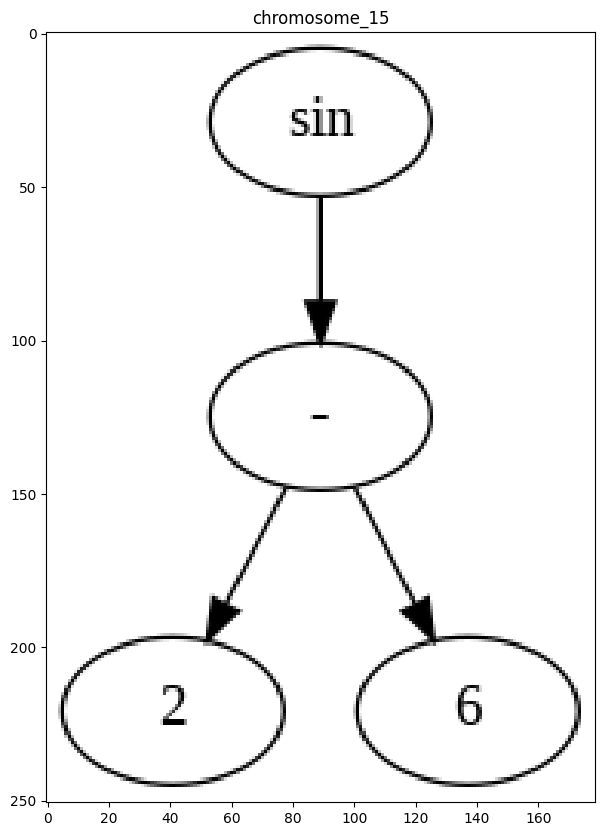

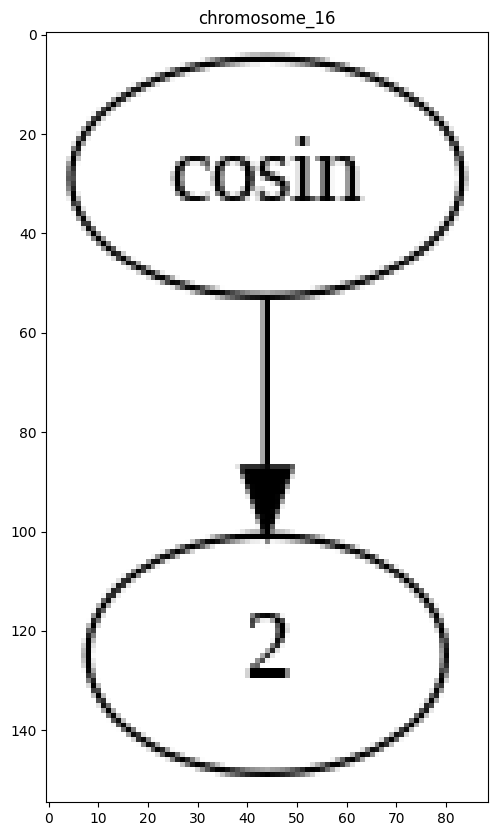

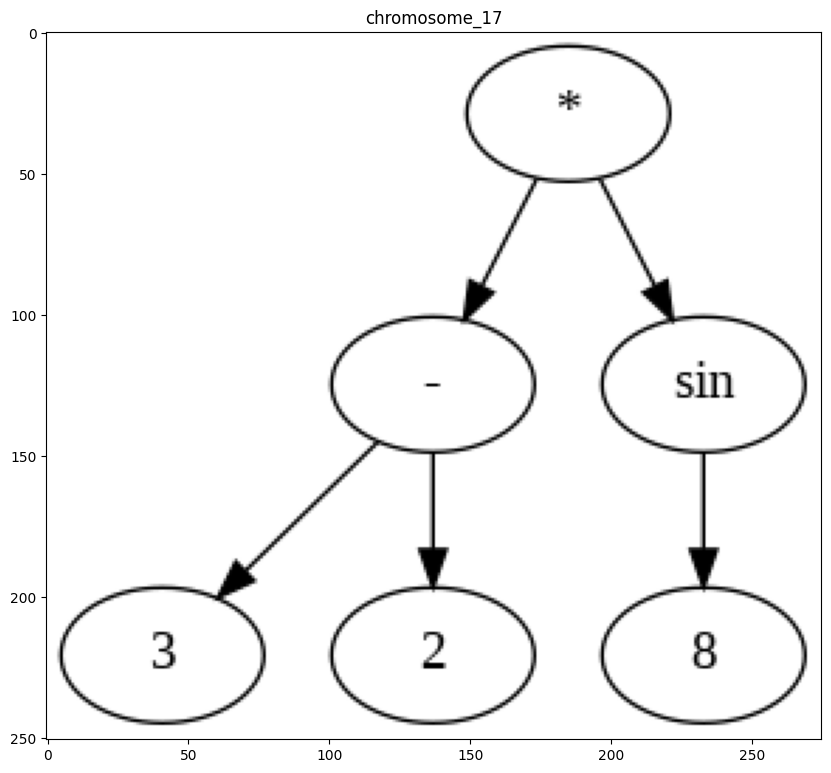

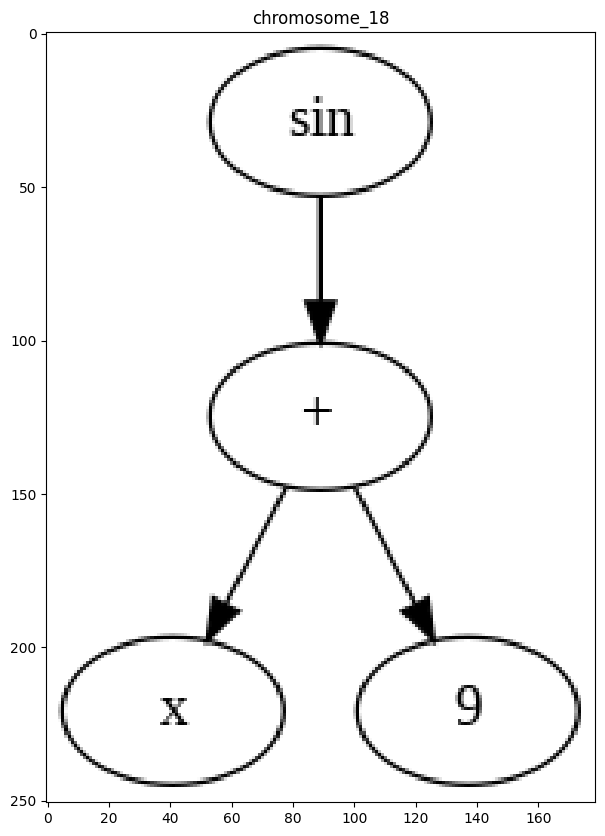

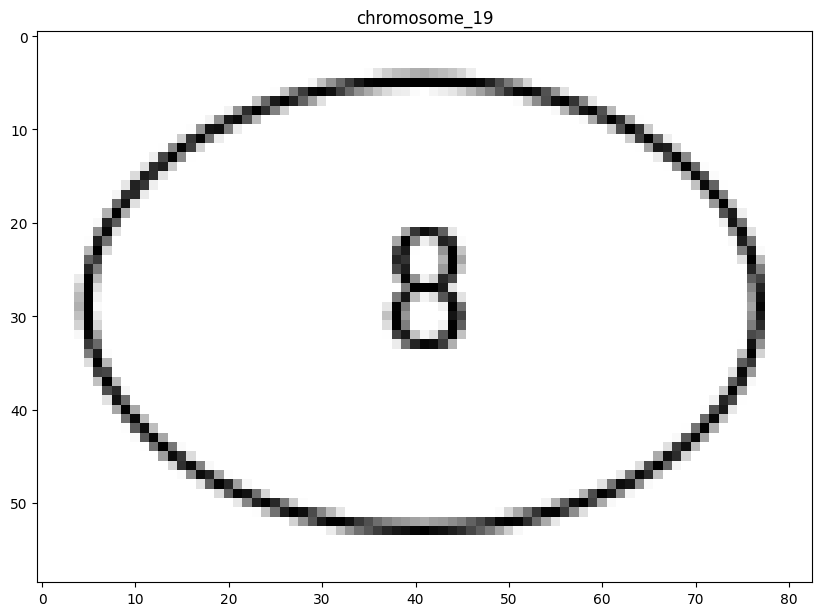

In [85]:

depth = 2
vars = ['x']
num_chromosomes = 20

chromosomes4 = []

for i in range(num_chromosomes):
    chromosomes4.append(Chromosome(depth, vars))
    dot = chromosomes4[i].visualize_tree()
    dot.render(f'chromosome_{i}', format='png', cleanup=True)
    img = Image.open(f'chromosome_{i}.png')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    plt.title(f'chromosome_{i}')
    plt.show()

In [86]:
fitnesses4 = []
for chromosome in chromosomes4:
  fitnesses4.append(chromosome.evalFitness(points,func4))

print(fitnesses4)

[0.0, 0.0407, 0.02, 0.0407, 0.0376, 0.0, 0.036, 0.0, 0.0407, 0.04, 0.0366, 0.0002, 0.0374, 0.0374, 0.0362, 0.0373, 0.0363, 0.0375, 0.037, 0.0428]


In [87]:
selected_chromosomes4 = select_chromosomes(chromosomes4,fitnesses4)
for item in selected_chromosomes4:
  print(f'chromosome {chromosomes4.index(item["chromosome"])} Fitness : {item["fitness"]}')

chromosome 19 Fitness : 0.0428
chromosome 14 Fitness : 0.0362
chromosome 9 Fitness : 0.04
chromosome 10 Fitness : 0.0366
chromosome 8 Fitness : 0.0407
chromosome 17 Fitness : 0.0375
chromosome 2 Fitness : 0.02
chromosome 15 Fitness : 0.0373
chromosome 13 Fitness : 0.0374
chromosome 1 Fitness : 0.0407


In [88]:
best_generation4 = evolve_population(chromosomes4,fitnesses4,func4,vars)

Generation 0 has an average fitness of 0.03620333333333334


<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))
<ipython-input-21-fc53ed4af587>:6: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


Generation 1 has an average fitness of 0.03655111111111111
Generation 2 has an average fitness of 0.03823
Generation 3 has an average fitness of 0.037664444444444445
Generation 4 has an average fitness of 0.033404444444444445
Generation 5 has an average fitness of 0.03462777777777778
Generation 6 has an average fitness of 0.03805
Generation 7 has an average fitness of 0.03548222222222222
Generation 8 has an average fitness of 0.03947222222222223
Generation 9 has an average fitness of 0.036575555555555556
Generation 10 has an average fitness of 0.028811111111111107
Generation 11 has an average fitness of 0.03801222222222222
Generation 12 has an average fitness of 0.03556111111111111
Generation 13 has an average fitness of 0.03524111111111112
Generation 14 has an average fitness of 0.03692333333333333
Generation 15 has an average fitness of 0.03631444444444444
best_generation returned fitness avarage : 0.03947222222222223


Best Fitness: 0.159
Best Chromosome: <__main__.Chromosome object at 0x7fa6f7f00df0>


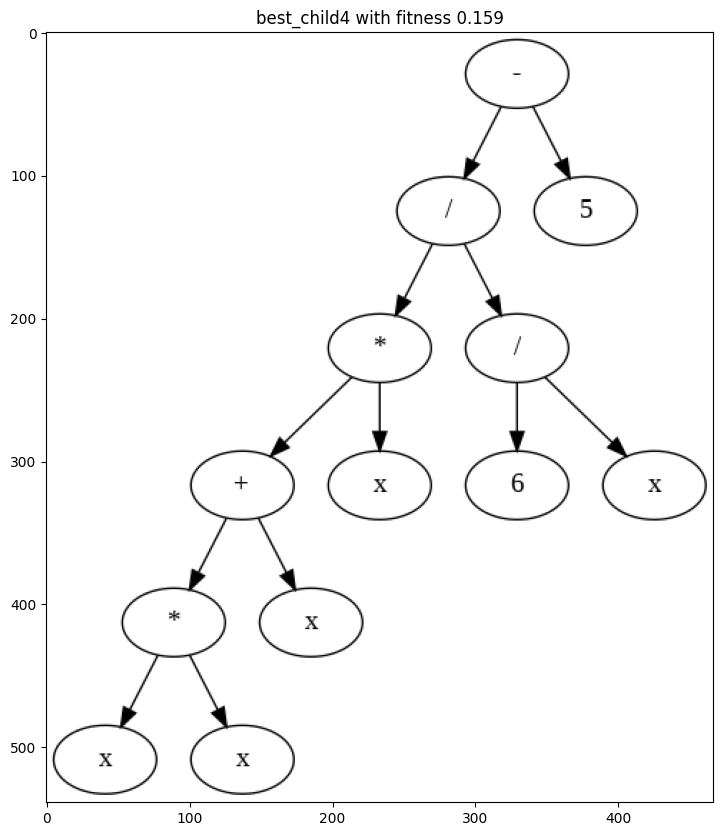

In [89]:
best_child4, best_fitness4 = get_max_fitness_chromosome(best_generation4, func4, vars)
print("Best Fitness:", best_fitness4)
print("Best Chromosome:", best_child4)

dot = best_child4.visualize_tree()
dot.render(f'best_child4', format='png', cleanup=True)
img = Image.open(f'best_child4.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'best_child4 with fitness {best_fitness4}')
plt.show()

In [90]:
mse = calculate_mse(best_child4, points, func4)
print("MSE:", mse)

MSE: 314.41677345527756


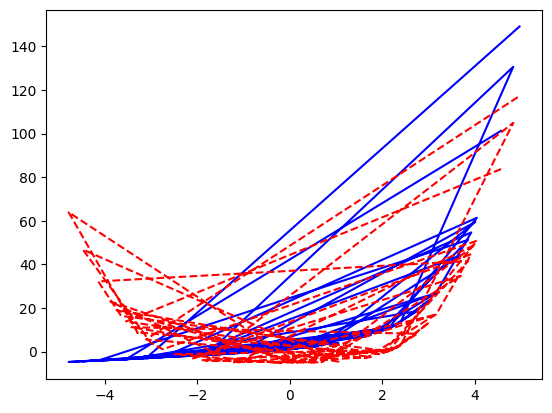

In [91]:
predicted_values = [best_child4.evaluate(best_child4.root, point) for point in points]
actual_values = np.array([func4(point['x'], point['y'], point['z']) for point in points])
plt.plot(x_values,actual_values,color='blue')
plt.plot(x_values,predicted_values,color='red',linestyle = 'dashed')
plt.show()



> Now I want to do the same thing for my 5th function which is a separated domain function, first I make the initial chromosomes, then i will crossover and mutate them for generations then i will show the best chromosome and its MSE:



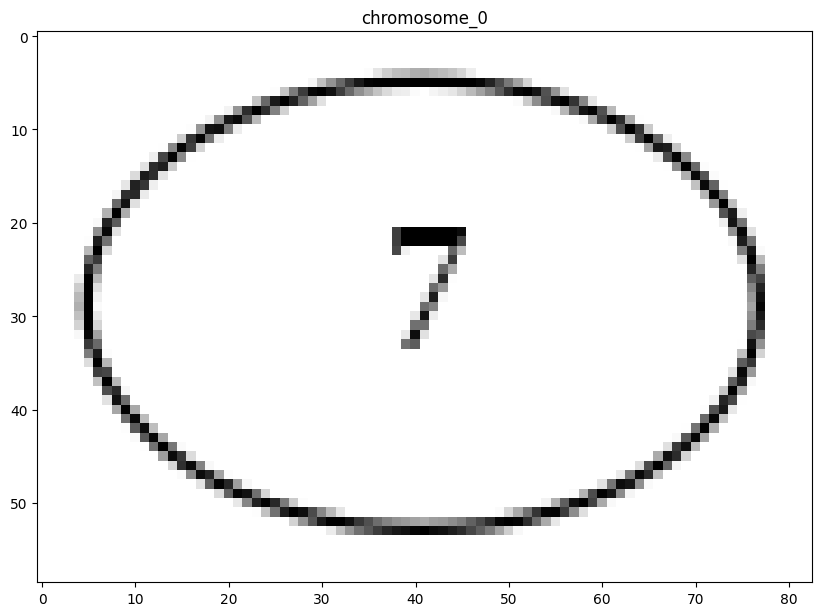

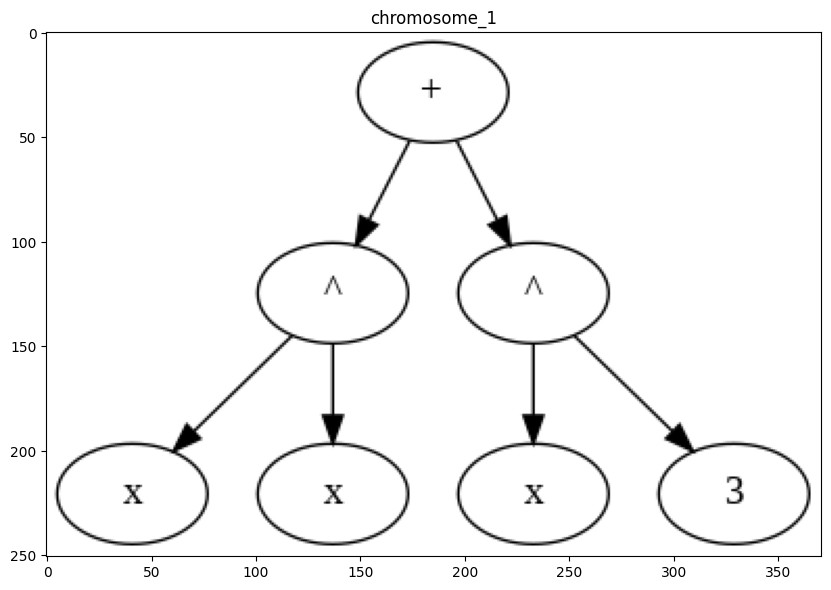

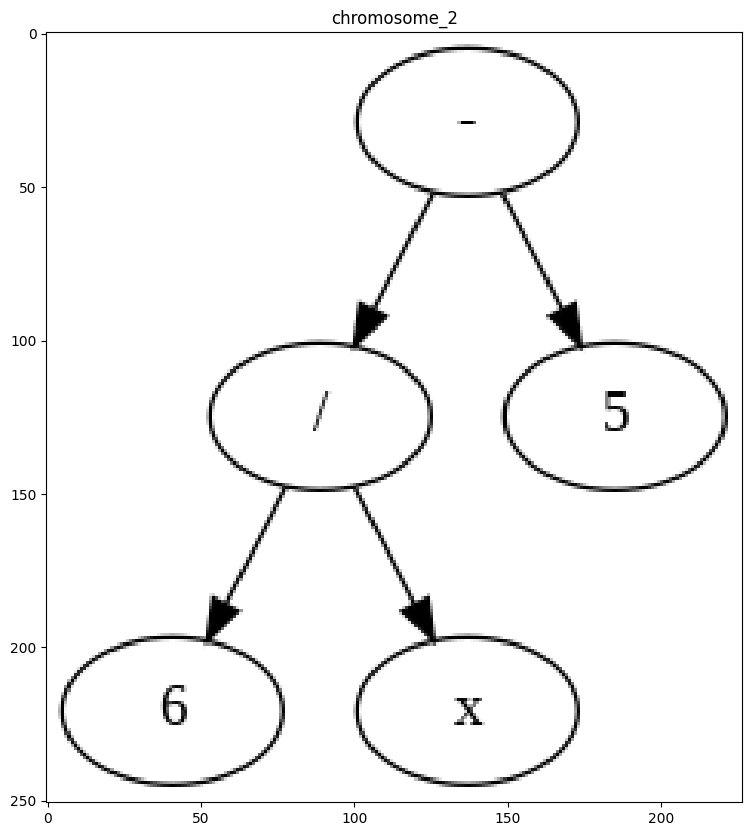

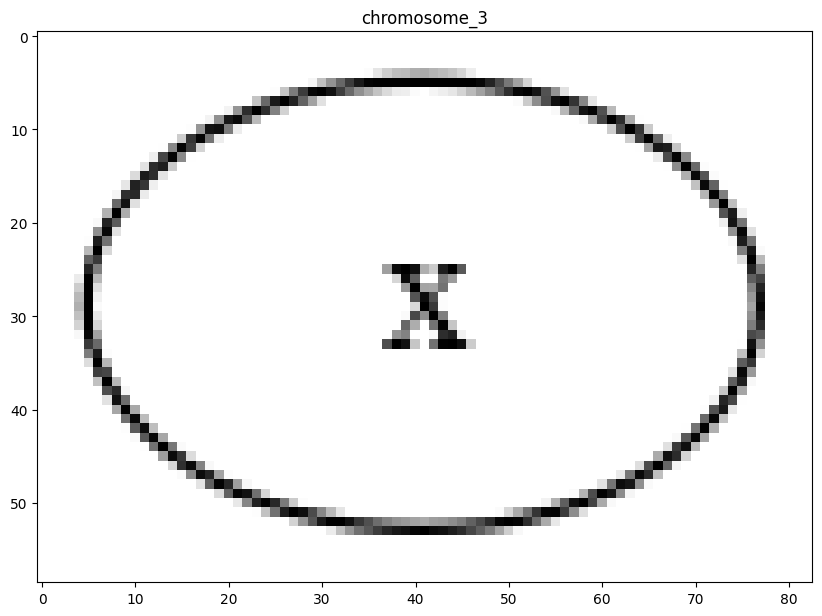

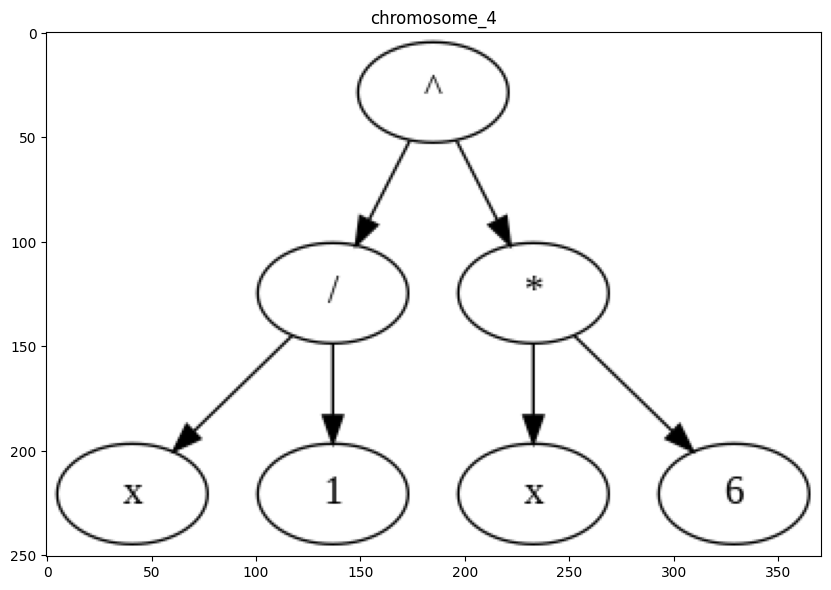

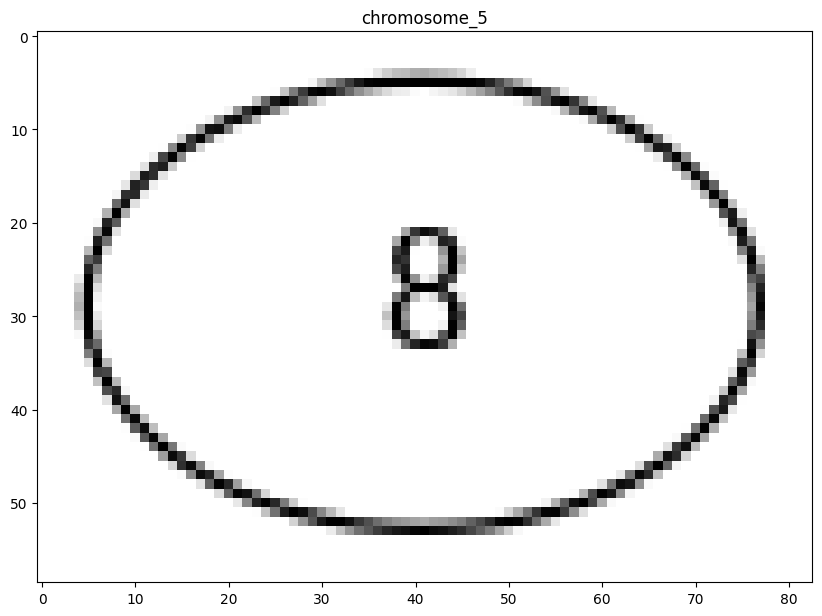

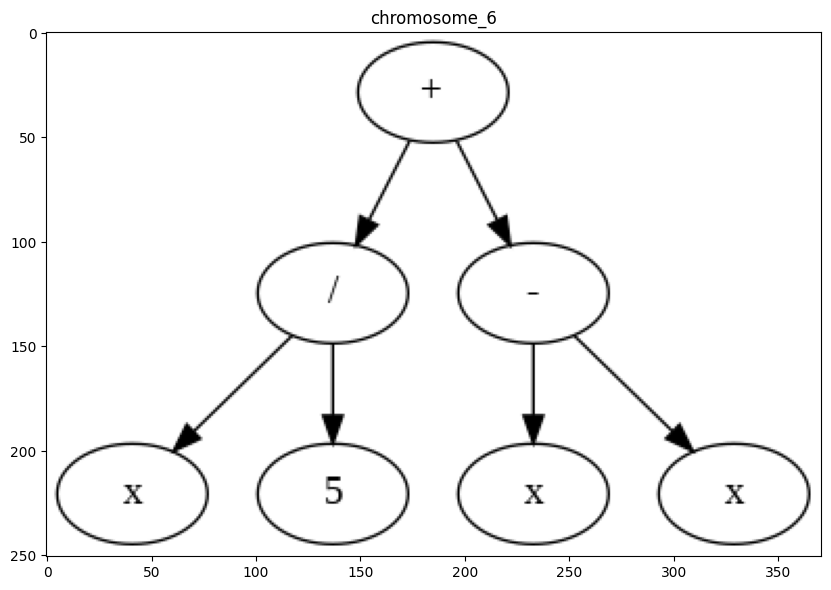

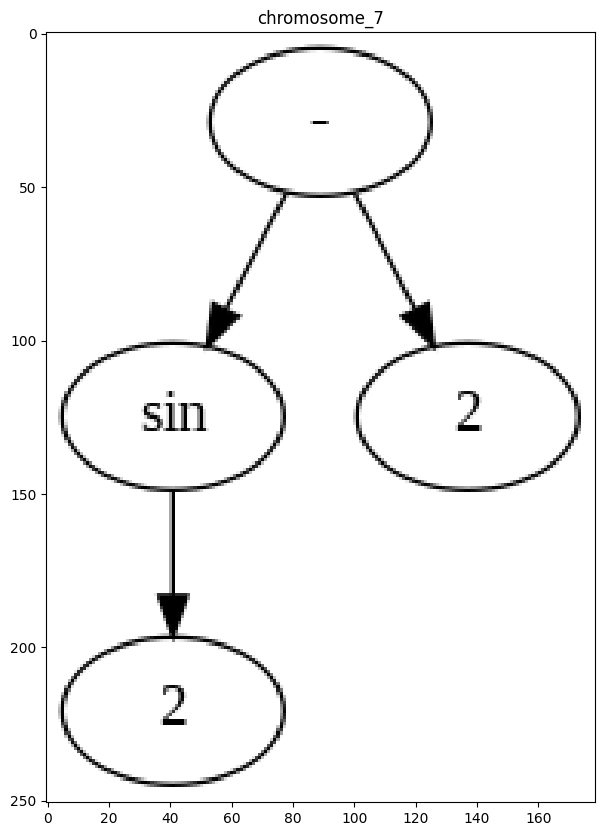

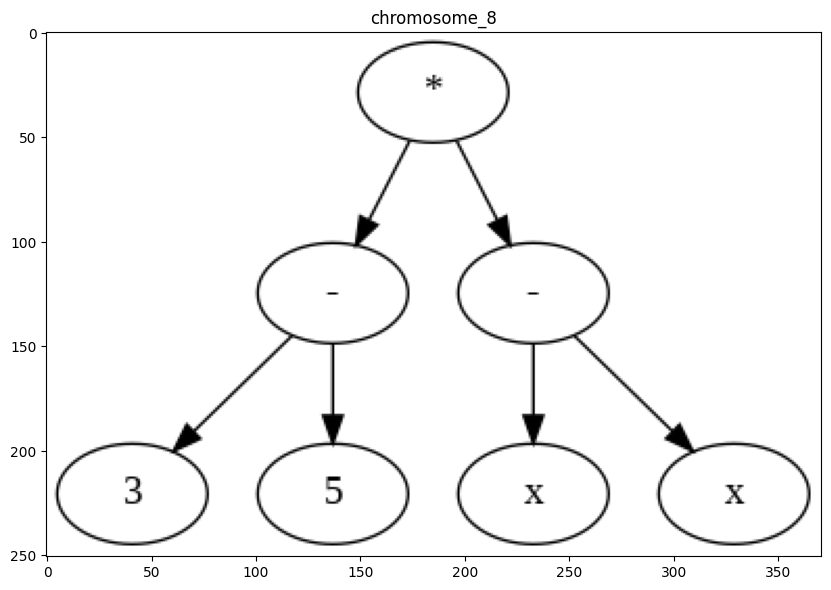

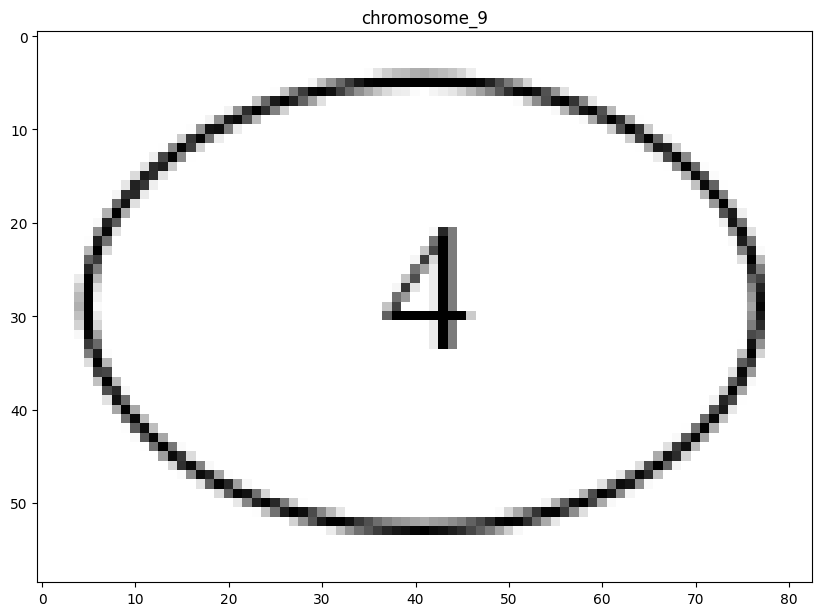

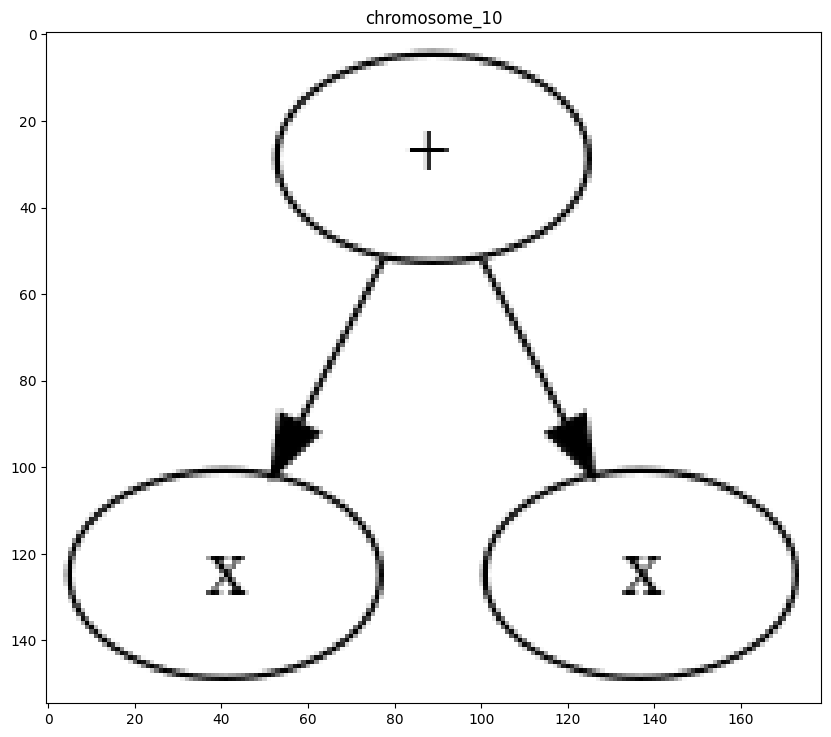

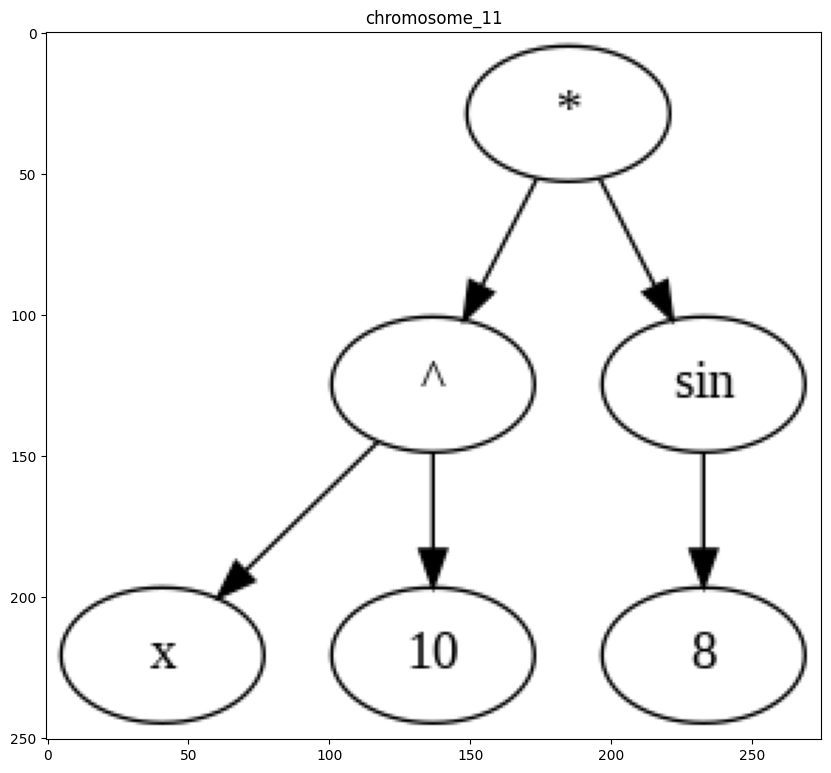

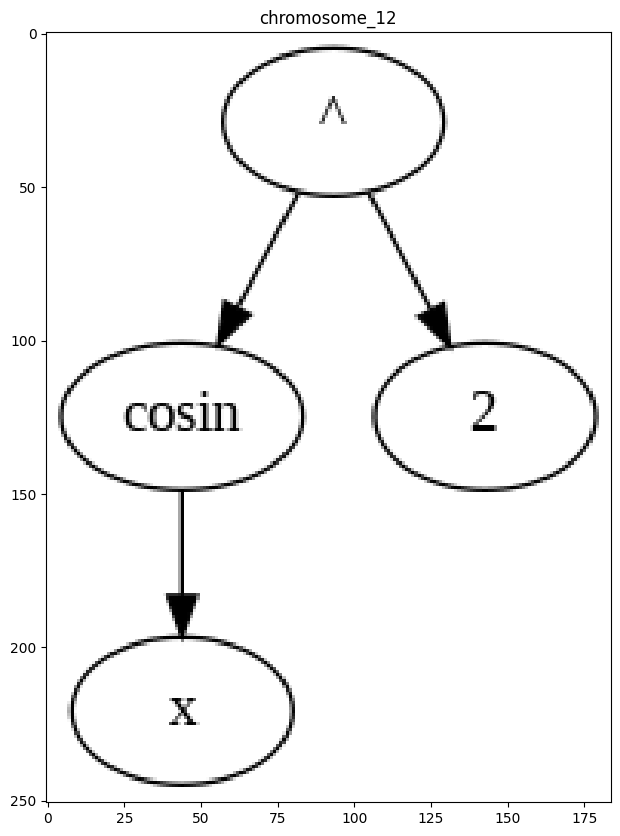

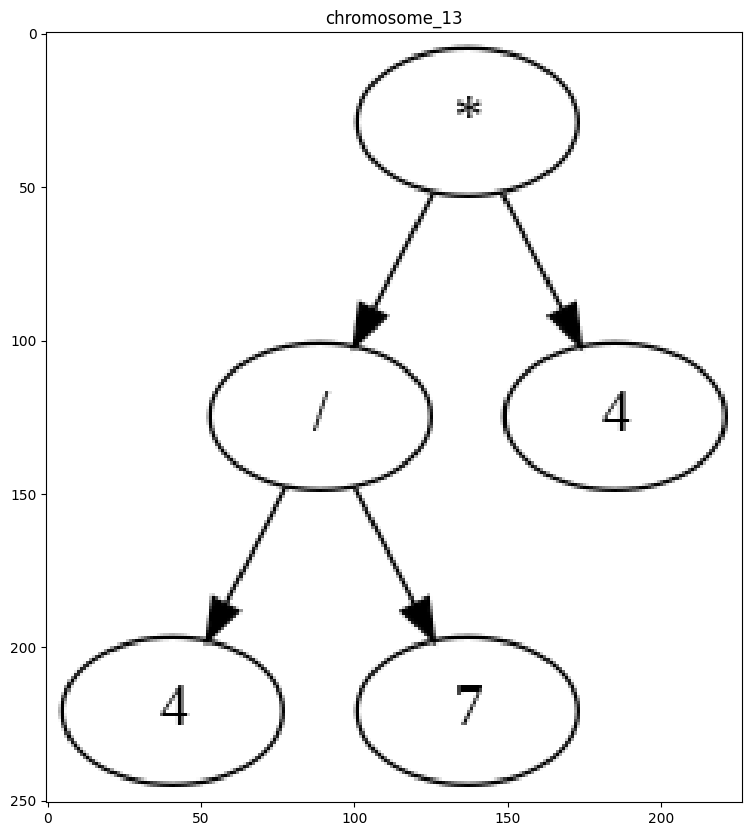

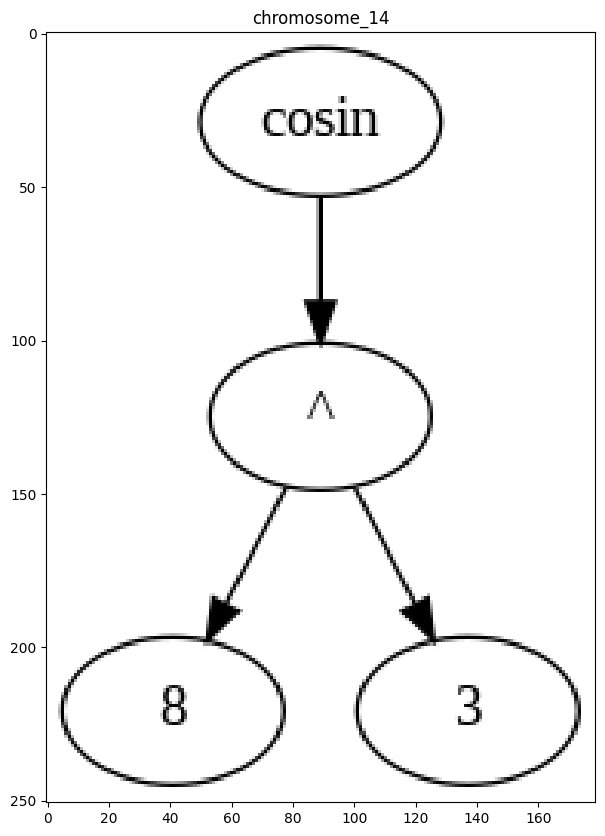

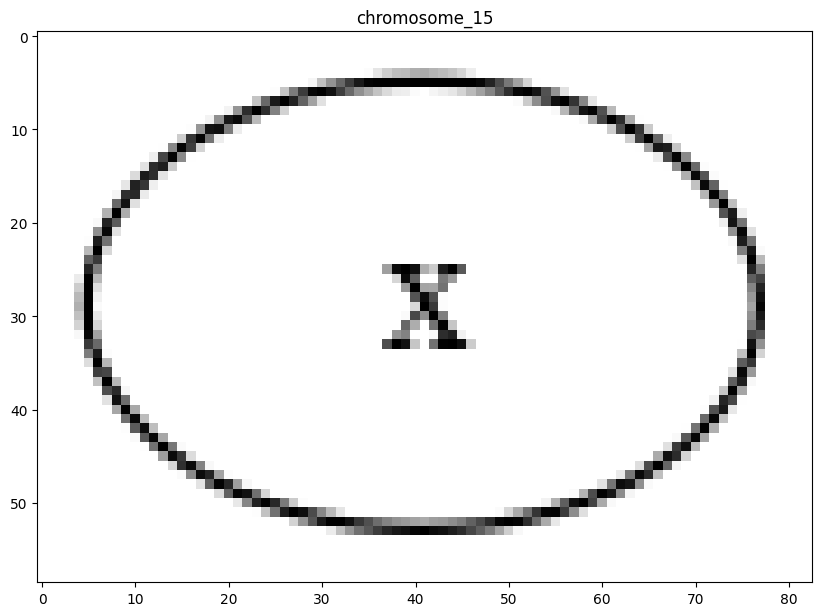

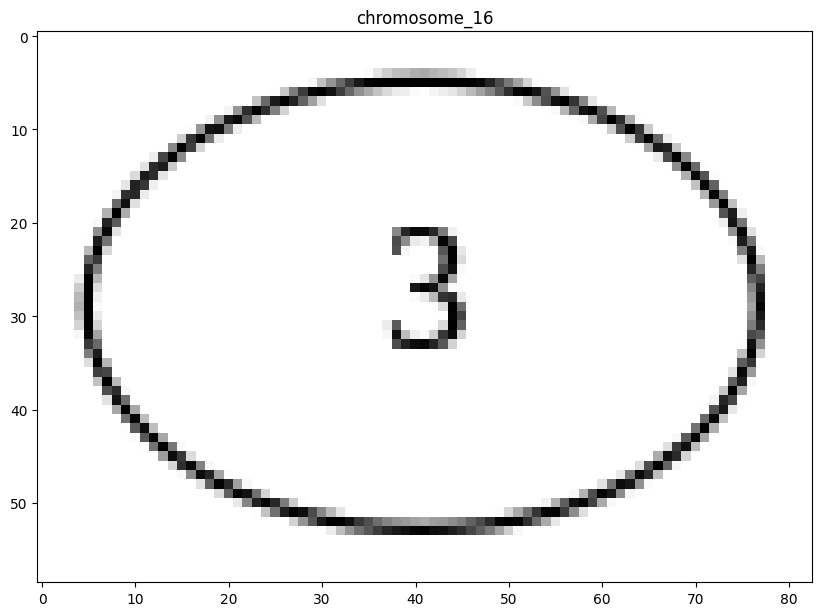

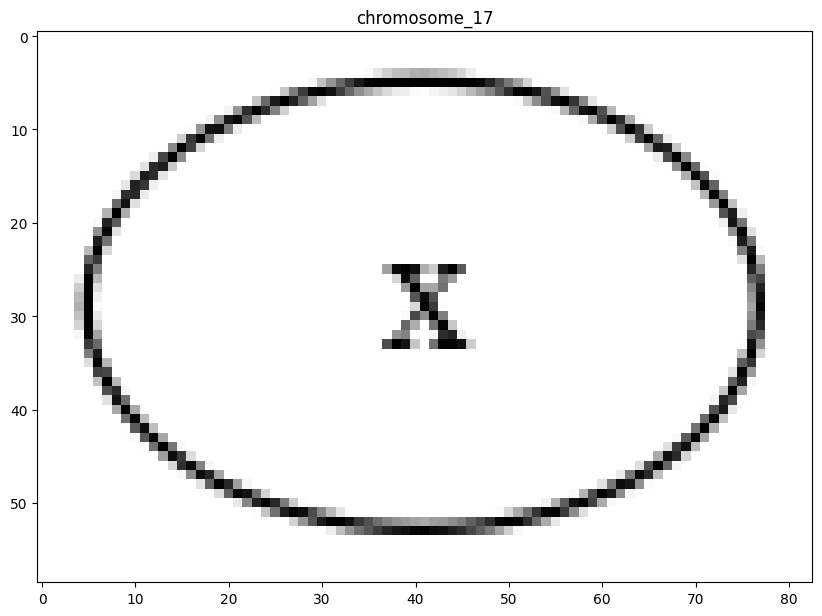

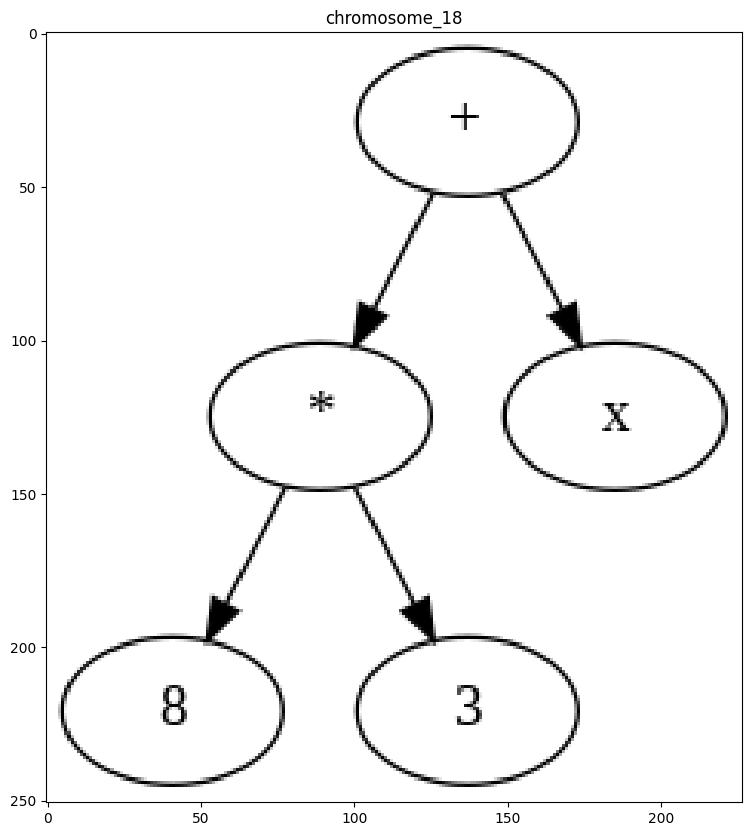

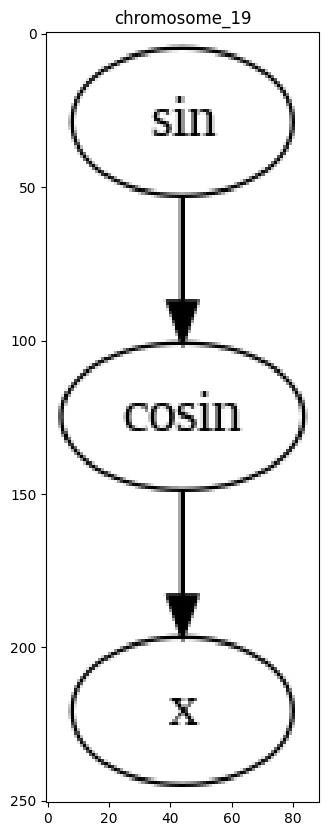

In [92]:

depth = 2
vars = ['x']
num_chromosomes = 20

chromosomes5 = []

for i in range(num_chromosomes):
    chromosomes5.append(Chromosome(depth, vars))
    dot = chromosomes5[i].visualize_tree()
    dot.render(f'chromosome_{i}', format='png', cleanup=True)
    img = Image.open(f'chromosome_{i}.png')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    plt.title(f'chromosome_{i}')
    plt.show()

In [93]:
fitnesses5 = []
for chromosome in chromosomes5:
  fitnesses5.append(chromosome.evalFitness(points,func5))

print(fitnesses5)

[0.8999, 0.0002, 0.1222, 1.2742, 0.0, 0.8089, 0.8235, 0.6367, 0.7375, 1.0245, 1.7968, 0.0, 0.772, 0.9429, 0.6451, 1.2742, 0.9891, 1.2742, 0.1197, 0.7003]


In [94]:
selected_chromosomes5 = select_chromosomes(chromosomes5,fitnesses5)
for item in selected_chromosomes5:
  print(f'chromosome {chromosomes5.index(item["chromosome"])} Fitness : {item["fitness"]}')

chromosome 3 Fitness : 1.2742
chromosome 13 Fitness : 0.9429
chromosome 12 Fitness : 0.772
chromosome 7 Fitness : 0.6367
chromosome 8 Fitness : 0.7375
chromosome 17 Fitness : 1.2742
chromosome 6 Fitness : 0.8235
chromosome 19 Fitness : 0.7003
chromosome 10 Fitness : 1.7968
chromosome 5 Fitness : 0.8089


In [95]:
best_generation5 = evolve_population(chromosomes5,fitnesses5,func5,vars)

Generation 0 has an average fitness of 1.0075044444444445


<ipython-input-7-1e5bb707b9d6>:84: RuntimeWarning: overflow encountered in scalar power
  result = np.float64(np.float64("{:.4f}".format((left_value))) ** np.float64("{:.4f}".format((right_value))))
<ipython-input-21-fc53ed4af587>:6: RuntimeWarning: overflow encountered in scalar power
  squared_errors = [(predicted - actual) ** 2 for predicted, actual in zip(predicted_values, actual_values)]


Generation 1 has an average fitness of 0.7491655555555555
Generation 2 has an average fitness of 0.7004177777777777
Generation 3 has an average fitness of 0.7249444444444444
Generation 4 has an average fitness of 0.7970244444444446
Generation 5 has an average fitness of 0.6980444444444446
Generation 6 has an average fitness of 0.7466844444444446
Generation 7 has an average fitness of 0.7620555555555556
Generation 8 has an average fitness of 0.7659000000000001
Generation 9 has an average fitness of 0.7351233333333332
Generation 10 has an average fitness of 0.7292922222222222
Generation 11 has an average fitness of 0.7142844444444445
Generation 12 has an average fitness of 0.913471111111111
Generation 13 has an average fitness of 0.709011111111111
Generation 14 has an average fitness of 0.7200844444444445
Generation 15 has an average fitness of 0.6978266666666667
Generation 16 has an average fitness of 0.7234755555555554
Generation 17 has an average fitness of 0.7295433333333333
Generati

Best Fitness: 18.4401
Best Chromosome: <__main__.Chromosome object at 0x7fa6f846c8e0>


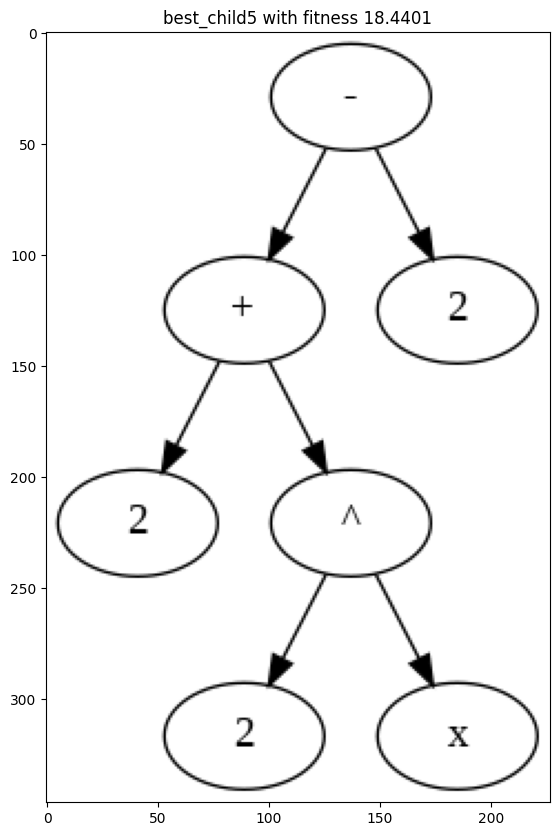

In [96]:
best_child5, best_fitness5 = get_max_fitness_chromosome(best_generation5, func5, vars)
print("Best Fitness:", best_fitness5)
print("Best Chromosome:", best_child5)

dot = best_child5.visualize_tree()
dot.render(f'best_child5', format='png', cleanup=True)
img = Image.open(f'best_child5.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
plt.title(f'best_child5 with fitness {best_fitness5}')
plt.show()

In [97]:
mse = calculate_mse(best_child5, points, func5)
print("MSE:", mse)

MSE: 2.7114828768032364


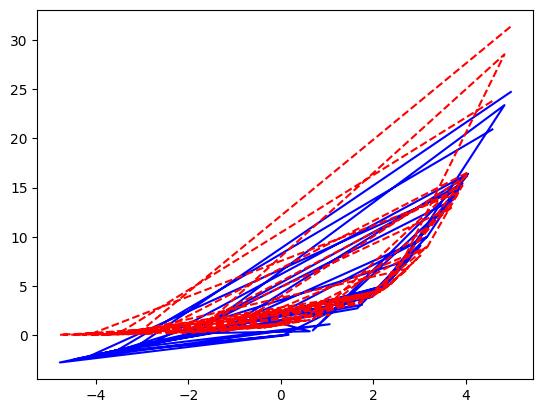

In [99]:
predicted_values = [best_child5.evaluate(best_child5.root, point) for point in points]
actual_values = np.array([func5(point['x'], point['y'], point['z']) for point in points])
plt.plot(x_values,actual_values,color='blue')
plt.plot(x_values,predicted_values,color='red',linestyle = 'dashed')
plt.show()